<a href="https://colab.research.google.com/github/Scottymichaelmillerguy/DataPreparation603Final/blob/main/SEIS603_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import FuncFormatter
from datetime import datetime
import math
from scipy.stats import iqr
import matplotlib.dates as mdates

In [ ]:
excel_file = '/content/Zillow_Data 1.xlsx'

In [ ]:
worksheet_names = ['Sales - CountAll', 'Sales -MedianSalesPrice', 'HomeValuesForcasts',
                   'HomeValues - All', 'Rentals - All', 'ForSale - Inventory',
                   'DaysOnMarket - All', 'DaysOnMarket - DaysToClose', 'NewCon - PricePerSqft',
                   'NewCon - All', 'NewCon - MedianSalesPrice', 'DaysOnMarket - DaysToCloseMean']

filtered_dataframes = {}

for sheet_name in worksheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet_name)

    if sheet_name == 'HomeValuesForcasts':
        filtered_df = df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'BaseDate'] +
                         [col for col in df.columns if '2023' in str(col) or '2024' in str(col) or '2025' in str(col)]]
    else:
        filtered_df = df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'] +
                         [col for col in df.columns if '2023' in str(col) or '2024' in str(col)]]

    filtered_dataframes[sheet_name] = filtered_df

for sheet_name, df in filtered_dataframes.items():
    print(f"Worksheet: {sheet_name}")
    print(df.head())

Worksheet: Sales - CountAll
   RegionID  SizeRank       RegionName RegionType StateName  \
0    102001         0    United States    country       NaN   
1    394913         1     New York, NY        msa        NY   
2    753899         2  Los Angeles, CA        msa        CA   
3    394463         3      Chicago, IL        msa        IL   
4    394514         4       Dallas, TX        msa        TX   

   2023-01-31 00:00:00  2023-02-28 00:00:00  2023-03-31 00:00:00  \
0               216598               237548               325272   
1                11427                10116                12477   
2                 4264                 4634                 6728   
3                 5530                 5712                 8917   
4                 3849                 5286                 6822   

   2023-04-30 00:00:00  2023-05-31 00:00:00  2023-06-30 00:00:00  \
0               300810               362199               383769   
1                11377                13346     

In [ ]:
filtered_dataframes.keys()

dict_keys(['Sales - CountAll', 'Sales -MedianSalesPrice', 'HomeValuesForcasts', 'HomeValues - All', 'Rentals - All', 'ForSale - Inventory', 'DaysOnMarket - All', 'DaysOnMarket - DaysToClose', 'NewCon - PricePerSqft', 'NewCon - All', 'NewCon - MedianSalesPrice', 'DaysOnMarket - DaysToCloseMean'])

## These are our DataFrames

In [ ]:
home_value_forecasts_df = filtered_dataframes['HomeValuesForcasts']
sales_count_all_df = filtered_dataframes['Sales - CountAll']
rental_all_df = filtered_dataframes['Rentals - All']
days_on_market_all_df = filtered_dataframes['DaysOnMarket - All']
days_on_market_days_to_close_df = filtered_dataframes['DaysOnMarket - DaysToClose']
home_value_all_df = filtered_dataframes['HomeValues - All']
new_con_price_per_sqft_df = filtered_dataframes['NewCon - PricePerSqft']
new_con_median_sale_price_df = filtered_dataframes['NewCon - MedianSalesPrice']
days_on_market_days_to_close_mean_df = filtered_dataframes['DaysOnMarket - DaysToCloseMean']

## Scotts Code

# Question 1:   Show me the market trends to help me decide. Which US market is doing best with respect to real-estate?

We need to do a group by by state but in order to know if we are to use mean or median values to groupby we need to evaluate the data and look at the skew and outliers

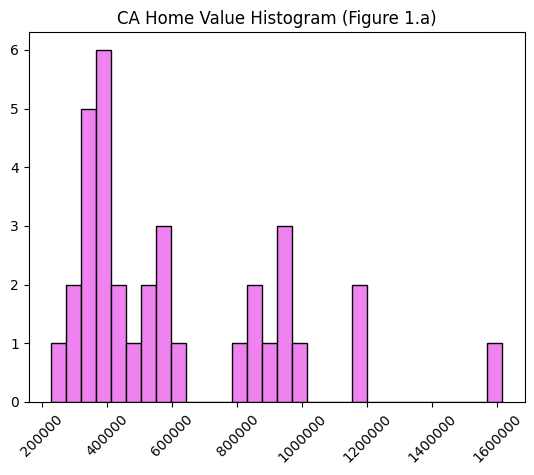

There are outliers in the data
The mean is 614429.0282438052
The median is 486745.7500404512
The interquartile range is 484387.3752092485
The max is 1614184.5478977277
The upper whisker is 1213326.812854324


In [ ]:

CA_home_values_df = home_value_all_df[home_value_all_df['StateName'] == 'CA']

CA_list = CA_home_values_df.columns
latest_date = CA_list[-1]


df = CA_home_values_df[latest_date]
plt.hist(df, bins = 30, color = 'violet', edgecolor = 'black')
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain')
plt.title("CA Home Value Histogram (Figure 1.a)")
plt.show()

df_mean =  df.mean()
df_median = df.median()
df_iqr = iqr(df)
df_max = df.max()
upper_whisker =df_median +  (1.5 * df_iqr)
lower_whisker = df_median - (1.5 * df_iqr)
max_minus_upper_whisker = df_max - upper_whisker

if max_minus_upper_whisker > 0:
  print("There are outliers in the data")
else:
  print("There are no outliers in the data")
print(f"The mean is {df_mean}")
print(f"The median is {df_median}")
print(f"The interquartile range is {df_iqr}")
print(f"The max is {df_max}")
print(f"The upper whisker is {upper_whisker}")


df_latest_date_region_name = CA_home_values_df[['StateName', 'RegionName', latest_date]]


# Average Monthly Home Value % Change by State

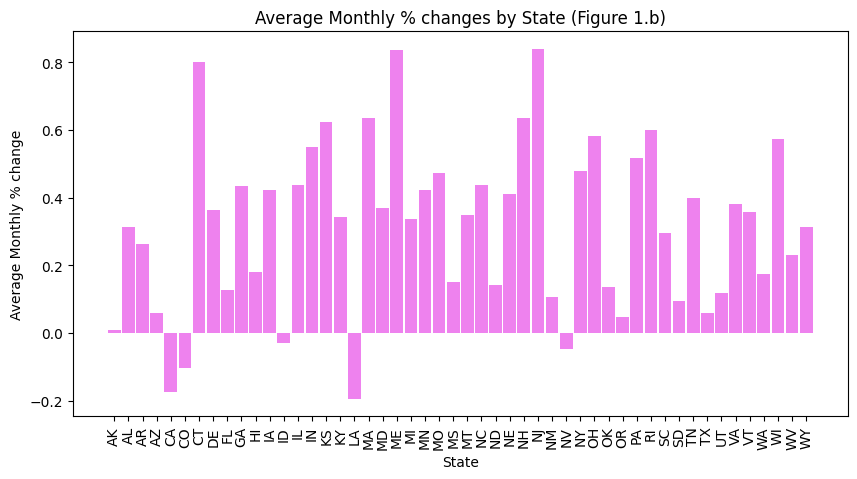

The state with the highest average month over month home value increase is NJ with a value of %0.83925839944836


In [ ]:
home_values_columns = list(home_value_all_df.columns)

columns_i_want = home_values_columns[4:]
state_home_values_df = home_value_all_df[columns_i_want]
median_grouped_state_df = state_home_values_df.groupby(['StateName']).median()



date_columns = columns_i_want[1:]
percent_change_list = []

state_diff_dict = {}
average_state_diff_dict = {}
for s in median_grouped_state_df.index:
  counter = len(date_columns)-1
  row = median_grouped_state_df.loc[s]
  diff_list = []

  while counter > 0:


    percent_diff_month_to_month = ((row[counter] - row[counter -1])/row[counter]) * 100
    diff_list.append(percent_diff_month_to_month)

    counter -=1
  diff_array = np.array(diff_list)
  state_diff_dict[s] = diff_array
  average_state_diff_dict[s] = diff_array.mean()


average_annual_state_diff_dict = {}
annual_state_diff = []
for s in median_grouped_state_df.index:
  row = median_grouped_state_df.loc[s]
  percent_diff_annual = ((row[-1] - row[-1 - 12])/ row[-1 - 12]) * 100
  annual_state_diff.append(percent_diff_annual)

  average_annual_state_diff_dict[s] = annual_state_diff[0]
  annual_state_diff = []




average_annual_state_diff = pd.Series(average_annual_state_diff_dict)



average_monthly_state_diff = pd.Series(average_state_diff_dict)

x = average_monthly_state_diff.index
y = average_monthly_state_diff.values
x1 = average_annual_state_diff.index
y1 = average_annual_state_diff.values
fig = plt.figure(figsize = (10, 5))


best_month_over_month_state = average_monthly_state_diff.idxmax()
percent_change_best_month_over_month = average_monthly_state_diff.max()




plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Average Monthly % change")
plt.title("Average Monthly % changes by State (Figure 1.b)")
plt.show()

print(f"The state with the highest average month over month home value increase is {best_month_over_month_state} with a value of %{percent_change_best_month_over_month}")

average_home_value_monthly_change = average_monthly_state_diff.sort_values(ascending = False)
average_home_value_annual_change = average_annual_state_diff.sort_values(ascending = False)

# Rolling 12 Month Average Home Value % Change by State

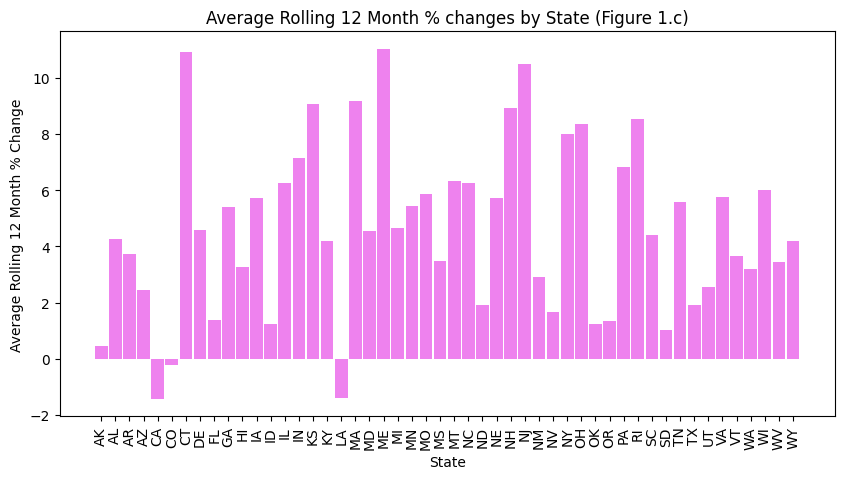

The state with the highest average annual value increase is ME with a value of %11.031698808655523


In [ ]:
fig = plt.figure(figsize = (10, 5))


best_annual_state = average_annual_state_diff.idxmax()
percent_change_best_annual = average_annual_state_diff.max()




plt.bar(x1, y1, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Average Rolling 12 Month % Change")
plt.title("Average Rolling 12 Month % changes by State (Figure 1.c)")
plt.show()
print(f"The state with the highest average annual value increase is {best_annual_state} with a value of %{percent_change_best_annual}")

# Average Monthly Home Value % Change by Region

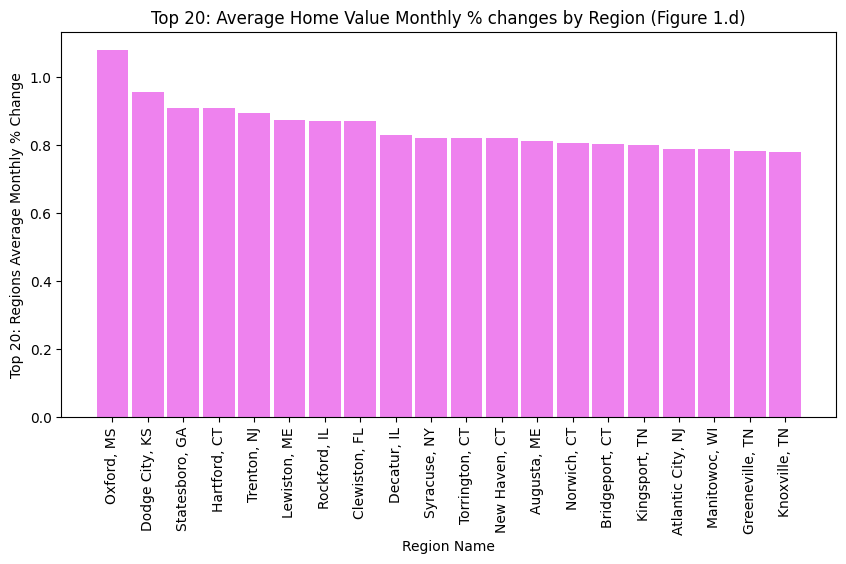

The region with the highest average monthly value increase is Oxford, MS with a value of %1.080333662670638


Oxford, MS           1.080334
Dodge City, KS       0.957185
Statesboro, GA       0.910490
Hartford, CT         0.909492
Trenton, NJ          0.895056
Lewiston, ME         0.873756
Rockford, IL         0.871150
Clewiston, FL        0.870449
Decatur, IL          0.829307
Syracuse, NY         0.821598
Torrington, CT       0.821460
New Haven, CT        0.821289
Augusta, ME          0.813641
Norwich, CT          0.807333
Bridgeport, CT       0.802559
Kingsport, TN        0.799589
Atlantic City, NJ    0.790381
Manitowoc, WI        0.788550
Greeneville, TN      0.782647
Knoxville, TN        0.779857
dtype: float64

In [ ]:

home_values_columns = list(home_value_all_df.columns)


c = home_values_columns[:]
category_column = [c[2]]
value_columns = c[5:]
want = category_column + value_columns
average_region_diff_dict = {}
just_region = home_value_all_df[home_value_all_df['RegionType'] == "msa"]
just_region = just_region[want]

date_columns = want[1:]
percent_change_list = []

diff_list = []

diff_dict = {}
average_diff_dict = {}
for s in just_region.RegionName:

  counter = len(date_columns)-1

  row = just_region[just_region['RegionName'] == s]
  diff_list = []

  while counter > 0:

    current_month = row[date_columns[counter]]
    previous_month = row[date_columns[counter -1]]
    percent_diff = ((current_month - previous_month)/previous_month) * 100
    diff_list.append(percent_diff)
    counter -=1
  diff_array = np.array(diff_list)
  diff_dict[s] = diff_array
  average_diff_dict[s] = diff_array.mean()




average_diff_series = pd.Series(average_diff_dict)

top_20 = average_diff_series.nlargest(20)


x = top_20 .index
y = top_20 .values

fig = plt.figure(figsize = (10, 5))


best_monthly_region = average_diff_series.idxmax()
percent_change_best_monthly_region = average_diff_series.max()


plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Region Name")
plt.ylabel("Top 20: Regions Average Monthly % Change")
plt.title("Top 20: Average Home Value Monthly % changes by Region (Figure 1.d)")
plt.show()
print(f"The region with the highest average monthly value increase is {best_monthly_region} with a value of %{percent_change_best_monthly_region}")
display(top_20)

# Rolling 12 Month Average Home Value % Change by Region

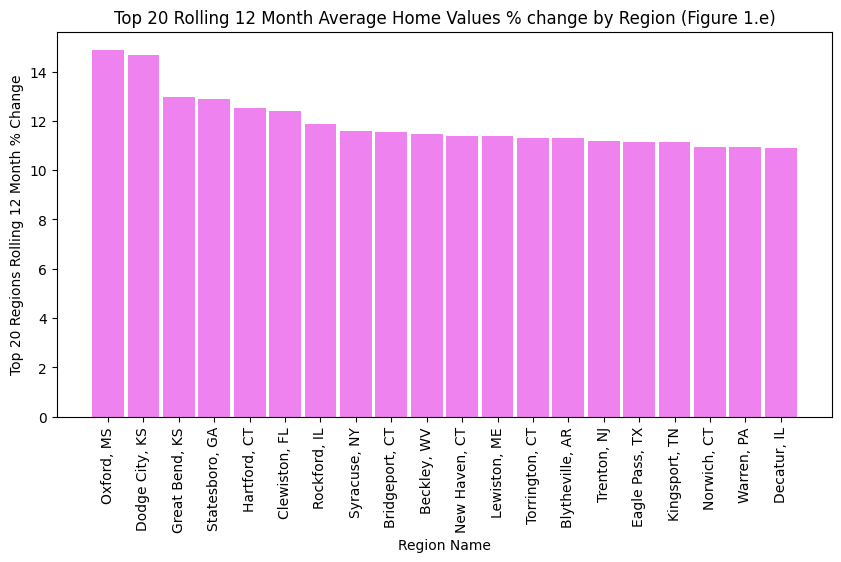

The region with the highest average annual value increase is Oxford, MS with a value of %14.875065887409214


Oxford, MS         14.875066
Dodge City, KS     14.675404
Great Bend, KS     12.981494
Statesboro, GA     12.897729
Hartford, CT       12.528794
Clewiston, FL      12.381039
Rockford, IL       11.861729
Syracuse, NY       11.595789
Bridgeport, CT     11.532587
Beckley, WV        11.444487
New Haven, CT      11.372638
Lewiston, ME       11.372171
Torrington, CT     11.321070
Blytheville, AR    11.293086
Trenton, NJ        11.180812
Eagle Pass, TX     11.143339
Kingsport, TN      11.133002
Norwich, CT        10.938151
Warren, PA         10.935126
Decatur, IL        10.902577
dtype: float64

In [ ]:


for s in just_region.RegionName:

  counter = len(date_columns)-1

  row = just_region[just_region['RegionName'] == s]
  diff_list = []
  latest_month =row[date_columns[-1]]
  last_year_same_month = row[date_columns[-1 - 12]]
  annual_diff_percent = ((latest_month - last_year_same_month)/last_year_same_month) * 100
  diff_list.append(annual_diff_percent)

  diff_array = np.array(diff_list)
  diff_dict[s] = diff_array
  average_diff_dict[s] = diff_array[0][0]


diff_region_series = pd.Series(average_diff_dict)
top_20 = diff_region_series.nlargest(20)


fig = plt.figure(figsize = (10, 5))


best_annual_region = diff_region_series.idxmax()
percent_change_best_annual_region = diff_region_series.max()
x = top_20.index
y = top_20.values

plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Region Name")
plt.ylabel("Top 20 Regions Rolling 12 Month % Change")
plt.title("Top 20 Rolling 12 Month Average Home Values % change by Region (Figure 1.e)")
plt.show()
print(f"The region with the highest average annual value increase is {best_annual_region} with a value of %{percent_change_best_annual_region}")
display(top_20)

# Month Forecast Home Value By State

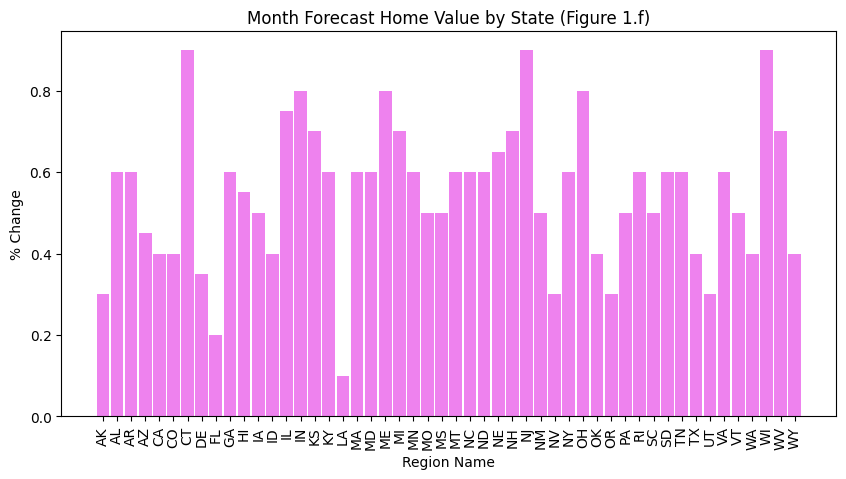

,StateName,2024-04-30 00:00:00
30,NJ,0.90
47,WI,0.90
6,CT,0.90
34,OH,0.80
14,IN,0.80
20,ME,0.80
13,IL,0.75
29,NH,0.70
15,KS,0.70
21,MI,0.70


In [ ]:
df = home_value_forecasts_df.copy()
df.head()
cols = df.columns

string_column = str(cols[6])
cols_i_want = cols[4:]

df_state = df[cols_i_want]
grouped_state_df = df_state.groupby(['StateName']).median()

one_month_state_df = grouped_state_df[cols[6]]
state_month_forecast_df = one_month_state_df.to_frame()

test_dict = {}
state_list = []
value_list = []

for (a,b) in zip(state_month_forecast_df.index, state_month_forecast_df.values):
  state_list.append(a)
  value_list.append(b[0])

test_dict['StateName'] = state_list
test_dict[string_column] = value_list


target_df = pd.DataFrame(data = test_dict)


target_category = target_df['StateName']
target_date = target_df[string_column]

x_axis = target_category
y_axis = target_date
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Region Name")
plt.ylabel("% Change")
plt.title("Month Forecast Home Value by State (Figure 1.f)")
plt.show()

display(target_df.sort_values(by=string_column, ascending = False))


month_forecast_by_state = target_df.copy()

# Month Home Value Forecast By Region

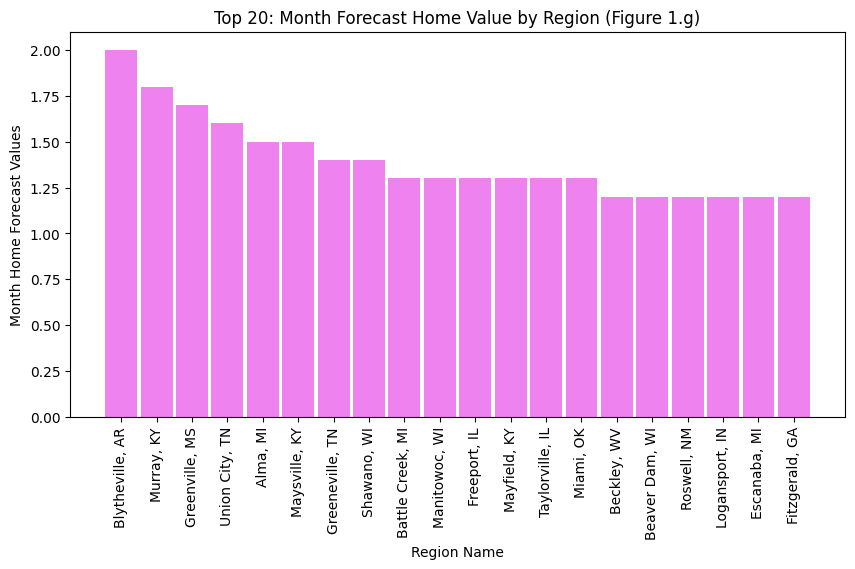

The region with the highest monthly forecast is Blytheville, AR with a forecast value of 2.0


,RegionName,2024-04-30 00:00:00
670,"Blytheville, AR",2.0
714,"Murray, KY",1.8
630,"Greenville, MS",1.7
786,"Union City, TN",1.6
665,"Alma, MI",1.5
881,"Maysville, KY",1.5
472,"Greeneville, TN",1.4
634,"Shawano, WI",1.4
309,"Battle Creek, MI",1.3
435,"Manitowoc, WI",1.3


In [ ]:

df = home_value_forecasts_df.copy()


col_list = []
for col in df.columns:
  col_list.append(col)



target_category = col_list[2]
target_date_col = col_list[6]

month_forecast_df = df[[target_category, target_date_col]]

top_20_month_forecast_df = month_forecast_df.nlargest(20, target_date_col)

x_axis = top_20_month_forecast_df[target_category]
y_axis = top_20_month_forecast_df[target_date_col]
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Region Name")
plt.ylabel("Month Home Forecast Values")
plt.title("Top 20: Month Forecast Home Value by Region (Figure 1.g)")
plt.show()

top_value_series = month_forecast_df.nlargest(1, target_date_col)
top_month_region = top_value_series['RegionName'].values[0]
top_month_forecast_value = top_value_series[target_date_col].values[0]
print(f"The region with the highest monthly forecast is {top_month_region} with a forecast value of {top_month_forecast_value}")
display(top_20_month_forecast_df)

top_month_region = top_20_month_forecast_df.iloc[0,0]

top_month_forecast_value = top_20_month_forecast_df.iloc[0,1]





# 3 Month Forecast By State

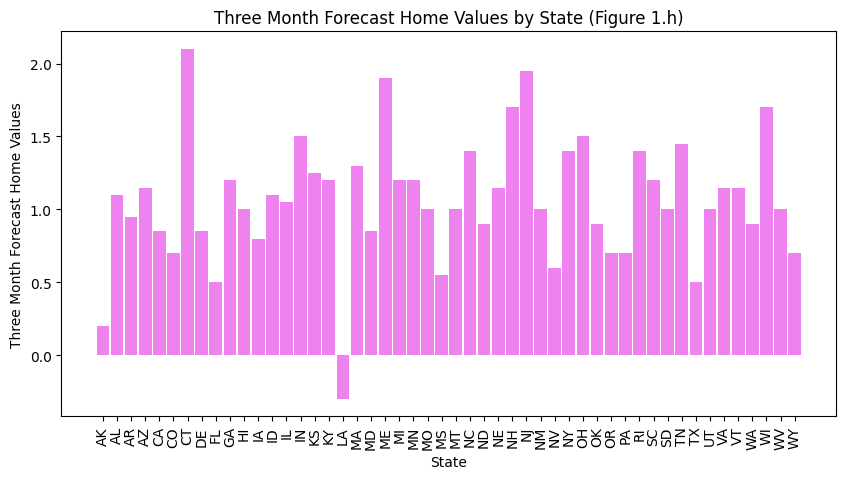

The state that has the best 3 month forecast value is CT with a value of 2.1


,StateName,2024-06-30 00:00:00
6,CT,2.10
30,NJ,1.95
20,ME,1.90
47,WI,1.70
29,NH,1.70
34,OH,1.50
14,IN,1.50
41,TN,1.45
38,RI,1.40
33,NY,1.40


In [ ]:
df = home_value_forecasts_df.copy()
df.head()
cols = df.columns

string_column = str(cols[7])
cols_i_want = cols[4:]

df_state = df[cols_i_want]
grouped_state_df = df_state.groupby(['StateName']).median()

three_month_state_df = grouped_state_df[cols[7]]
state_three_month_forecast_df = three_month_state_df.to_frame()

test_dict = {}
state_list = []
value_list = []

for (a,b) in zip(state_three_month_forecast_df.index, state_three_month_forecast_df.values):
  state_list.append(a)
  value_list.append(b[0])

test_dict['StateName'] = state_list
test_dict[string_column] = value_list


target_df = pd.DataFrame(data = test_dict)


target_category = target_df['StateName']
target_date = target_df[string_column]

x_axis = target_category
y_axis = target_date
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Three Month Forecast Home Values")
plt.title("Three Month Forecast Home Values by State (Figure 1.h)")
plt.show()
top_series = target_df.nlargest(1, columns = [string_column])
top_state = top_series['StateName'].values[0]
top_state_value = top_series[string_column].values[0]
print(f"The state that has the best 3 month forecast value is {top_state} with a value of {top_state_value}")

display(target_df.sort_values(by=string_column, ascending = False))

three_month_state_forecast = target_df.copy()

# 3 Month Forecast By Region

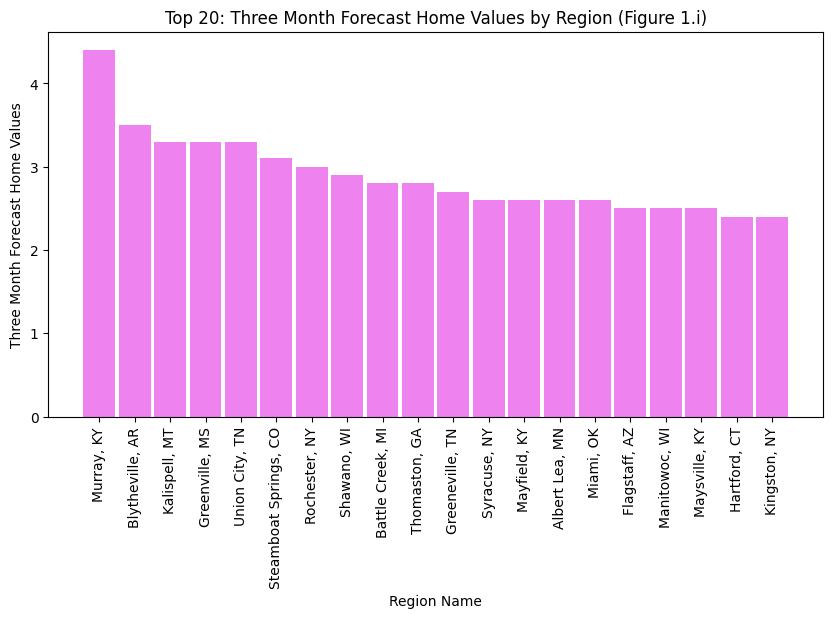

The region with the highest monthly forecast is Murray, KY with a forecast value of 4.4


,RegionName,2024-06-30 00:00:00
714,"Murray, KY",4.4
670,"Blytheville, AR",3.5
373,"Kalispell, MT",3.3
630,"Greenville, MS",3.3
786,"Union City, TN",3.3
832,"Steamboat Springs, CO",3.1
51,"Rochester, NY",3.0
634,"Shawano, WI",2.9
309,"Battle Creek, MI",2.8
810,"Thomaston, GA",2.8


In [ ]:

target_category = col_list[2]
target_date_col = col_list[7]

quarter_forecast_df = df[[target_category, target_date_col]]

top_20_3_month_forecast_df = quarter_forecast_df.nlargest(20, target_date_col)

x_axis = top_20_3_month_forecast_df[target_category]
y_axis = top_20_3_month_forecast_df[target_date_col]
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Region Name")
plt.ylabel("Three Month Forecast Home Values")
plt.title("Top 20: Three Month Forecast Home Values by Region (Figure 1.i)")
plt.show()

top_1 = quarter_forecast_df.nlargest(1, target_date_col)
top_3_month_region = top_1['RegionName'].values[0]
top_3_month_forecast_value = top_1[target_date_col].values[0]

print(f"The region with the highest monthly forecast is {top_3_month_region} with a forecast value of {top_3_month_forecast_value}")
display(top_20_3_month_forecast_df)

top_3_month_region = top_20_3_month_forecast_df.iloc[0,0]

top_3_month_forecast_value = top_20_3_month_forecast_df.iloc[0,1]



# 12 Month Foecast by State

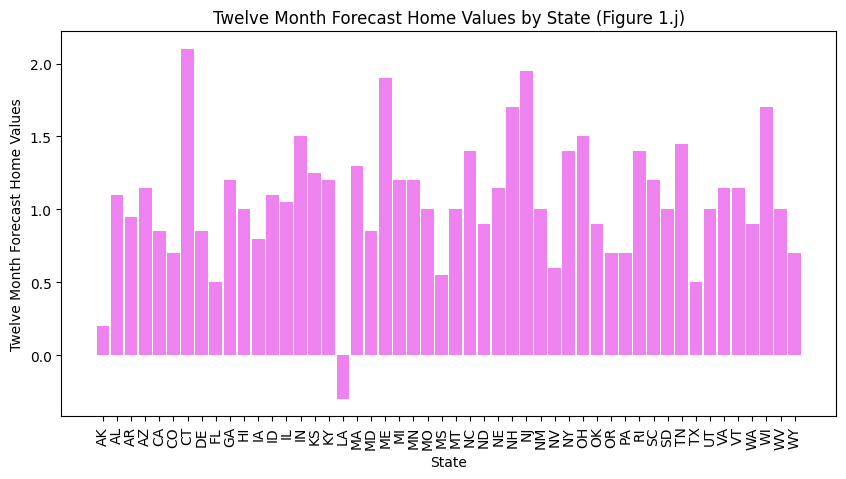

The state with the top 12 Month forecast value is CT with a value of 2.1.


,StateName,2025-03-31 00:00:00
6,CT,2.10
30,NJ,1.95
20,ME,1.90
47,WI,1.70
29,NH,1.70
34,OH,1.50
14,IN,1.50
41,TN,1.45
38,RI,1.40
33,NY,1.40


In [ ]:
df = home_value_forecasts_df.copy()
df.head()
cols = df.columns

string_column = str(cols[8])
cols_i_want = cols[4:]

df_state = df[cols_i_want]
grouped_state_df = df_state.groupby(['StateName']).median()

twelve_month_state_df = grouped_state_df[cols[7]]
state_twelve_month_forecast_df = twelve_month_state_df.to_frame()

test_dict = {}
state_list = []
value_list = []

for (a,b) in zip(state_twelve_month_forecast_df.index, state_twelve_month_forecast_df.values):
  state_list.append(a)
  value_list.append(b[0])

test_dict['StateName'] = state_list
test_dict[string_column] = value_list


target_df = pd.DataFrame(data = test_dict)

top_series = target_df.nlargest(1, columns = [string_column])
top_state = top_series['StateName'].values[0]
top_state_value = top_series[string_column].values[0]

target_category = target_df['StateName']
target_date = target_df[string_column]

x_axis = target_category
y_axis = target_date
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Twelve Month Forecast Home Values")
plt.title("Twelve Month Forecast Home Values by State (Figure 1.j)")
plt.show()
print(f"The state with the top 12 Month forecast value is {top_state} with a value of {top_state_value}.")
display(target_df.sort_values(by=string_column, ascending = False))

twelve_month_state_forecast_df = target_df.copy()

# 12 Month Forecast by Region

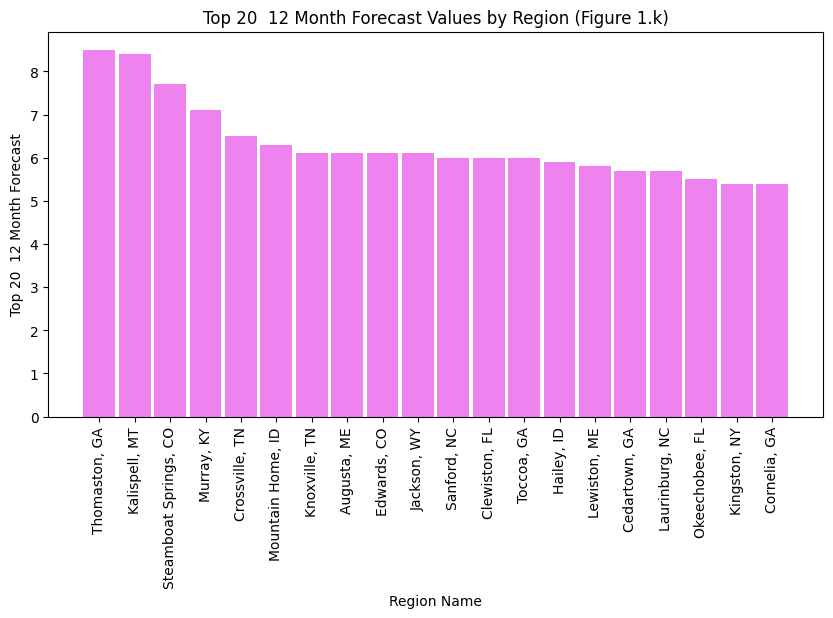

The region with the highest monthly forecast is Thomaston, GA with a forecast value of 8.5


,RegionName,2025-03-31 00:00:00
810,"Thomaston, GA",8.5
373,"Kalispell, MT",8.4
832,"Steamboat Springs, CO",7.7
714,"Murray, KY",7.1
518,"Crossville, TN",6.5
801,"Mountain Home, ID",6.3
64,"Knoxville, TN",6.1
329,"Augusta, ME",6.1
549,"Edwards, CO",6.1
744,"Jackson, WY",6.1


In [ ]:

target_category = col_list[2]
target_date_col = col_list[8]

year_forecast_df = df[[target_category, target_date_col]]

top_20_12_month_forecast_df = year_forecast_df.nlargest(20, target_date_col)

x_axis = top_20_12_month_forecast_df[target_category]
y_axis = top_20_12_month_forecast_df[target_date_col]
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("Region Name")
plt.ylabel("Top 20  12 Month Forecast")
plt.title("Top 20  12 Month Forecast Values by Region (Figure 1.k)")
plt.show()

top_1 = year_forecast_df.nlargest(1, target_date_col)
top_12_month_region = top_1['RegionName'].values[0]
top_12_month_forecast_value = top_1[target_date_col].values[0]



print(f"The region with the highest monthly forecast is {top_12_month_region} with a forecast value of {top_12_month_forecast_value}")
display(top_20_12_month_forecast_df)

top_12_month_region = top_20_3_month_forecast_df.iloc[0,0]

top_12_month_forecast_value = top_20_12_month_forecast_df.iloc[0,1]



# Average Monthly Rent Change by State

Given the most recent data we have on hand, the state with the highest rent is HI with a rent of 2873.357307158636


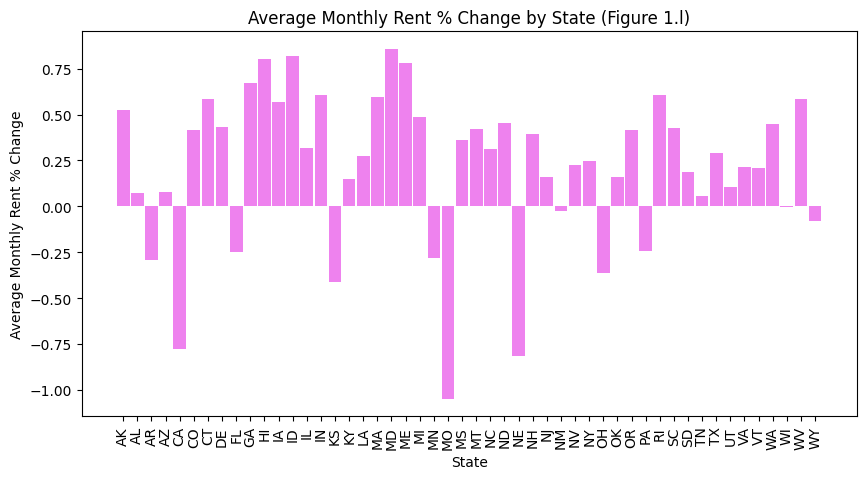

The state with the highest average month over month home rent increase is MD with a value of %0.8571115704686765


MD    0.857112
ID    0.820200
HI    0.800015
ME    0.778901
GA    0.670837
IN    0.605298
RI    0.605237
MA    0.598281
CT    0.584724
WV    0.582298
IA    0.565769
AK    0.525116
MI    0.485540
ND    0.453301
WA    0.447510
DE    0.433421
SC    0.424927
MT    0.423949
OR    0.417992
CO    0.415950
NH    0.393908
MS    0.361342
IL    0.318374
NC    0.309924
TX    0.289994
LA    0.275827
NY    0.247492
NV    0.222622
VA    0.214658
VT    0.210229
SD    0.185207
OK    0.158502
NJ    0.157591
KY    0.147559
UT    0.102784
AZ    0.078186
AL    0.074989
TN    0.056357
WI   -0.002389
NM   -0.026257
WY   -0.077808
PA   -0.243157
FL   -0.246639
MN   -0.281349
AR   -0.293110
OH   -0.364974
KS   -0.410124
CA   -0.778725
NE   -0.812665
MO   -1.048909
dtype: float64

In [ ]:
df =rental_all_df.copy()
rental_cols = df.columns
rental_cols_list = list(rental_cols)

date_cols = rental_cols_list[5:]
category_cols = rental_cols_list[4]
desired_cols = []
desired_cols.append(category_cols)
for item in date_cols:
  desired_cols.append(item)

new_df = df[desired_cols]

state_df = new_df.groupby(by = 'StateName').median()


current_state_highest_rent = state_df.nlargest(1, desired_cols[-1])
highest_state = current_state_highest_rent.index[0]
highest_state_rent = current_state_highest_rent.values[0][-1]
print(f"Given the most recent data we have on hand, the state with the highest rent is {highest_state} with a rent of {highest_state_rent}")





average_state_diff_dict = {}
state_diff_dict = {}
for s in state_df.index:
  counter = len(date_cols)-1
  row =state_df.loc[s]
  diff_list = []

  while counter > 0:


    percent_diff_month_to_month = ((row[counter] - row[counter -1])/row[counter]) * 100
    diff_list.append(percent_diff_month_to_month)

    counter -=1
  diff_array = np.array(diff_list)
  state_diff_dict[s] = diff_array
  average_state_diff_dict[s] = diff_array.mean()


state_series = pd.Series(average_state_diff_dict)
x = state_series.index
y = state_series.values



fig = plt.figure(figsize = (10, 5))


best_month_over_month_state = state_series.idxmax()
percent_change_best_month_over_month = state_series.max()




plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Average Monthly Rent % Change")
plt.title("Average Monthly Rent % Change by State (Figure 1.l)")
plt.show()

print(f"The state with the highest average month over month home rent increase is {best_month_over_month_state} with a value of %{percent_change_best_month_over_month}")

display(state_series.sort_values(ascending=False))

monthly_rent_change = state_series.sort_values(ascending=False)

# Average Rolling 12 Month Rent change by State

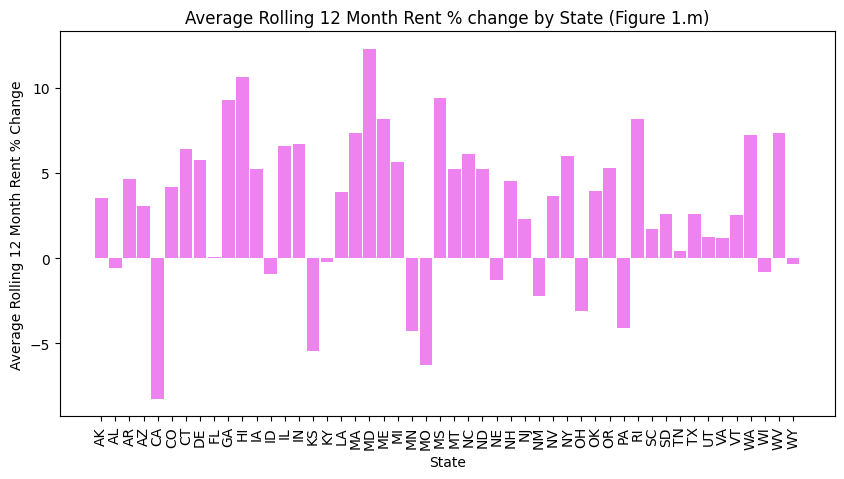

The state with the highest average rolling 12 month home rent increase is MD with a value of %12.277468235056737


MD    12.277468
HI    10.641651
MS     9.424397
GA     9.264773
RI     8.157114
ME     8.148969
MA     7.348108
WV     7.329445
WA     7.253560
IN     6.678784
IL     6.557544
CT     6.398125
NC     6.097960
NY     5.970904
DE     5.757355
MI     5.668586
OR     5.291515
ND     5.259228
MT     5.245457
IA     5.208707
AR     4.662661
NH     4.519390
CO     4.197827
OK     3.969284
LA     3.893845
NV     3.645003
AK     3.524213
AZ     3.038080
SD     2.575492
TX     2.566760
VT     2.537539
NJ     2.299051
SC     1.708991
UT     1.224522
VA     1.204167
TN     0.431744
FL     0.052076
KY    -0.214751
WY    -0.366719
AL    -0.589890
WI    -0.807749
ID    -0.946799
NE    -1.261507
NM    -2.202149
OH    -3.127767
PA    -4.072965
MN    -4.263841
KS    -5.466775
MO    -6.253087
CA    -8.265753
dtype: float64

In [ ]:

rental_cols = df.columns
rental_cols_list = list(rental_cols)

date_cols = rental_cols_list[5:]
category_cols = rental_cols_list[4]
desired_cols = []
desired_cols.append(category_cols)
for item in date_cols:
  desired_cols.append(item)

new_df = df[desired_cols]

state_df = new_df.groupby(by = 'StateName').median()



average_state_diff_dict = {}
state_diff_dict = {}
for s in state_df.index:
  counter = len(date_cols)-1
  row =state_df.loc[s]
  diff_list = []
  most_recent = row[-1]
  twelve_month_ago = row[-13]
  state_12_month_rent_diff = ((most_recent - twelve_month_ago)/twelve_month_ago) * 100
  state_diff_dict[s] = state_12_month_rent_diff


state_12_month = pd.Series(state_diff_dict)
x = state_12_month.index
y = state_12_month.values

fig = plt.figure(figsize = (10, 5))


best_12_month_state = state_12_month.idxmax()
percent_change_best_12_month = state_12_month.max()




plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Average Rolling 12 Month Rent % Change")
plt.title("Average Rolling 12 Month Rent % change by State (Figure 1.m)")
plt.show()

print(f"The state with the highest average rolling 12 month home rent increase is {best_12_month_state} with a value of %{percent_change_best_12_month}")

display(state_12_month.sort_values(ascending=False))

rolling_12_month_rent_change = state_12_month.sort_values(ascending=False)

# Monthly Average Sales Count by State



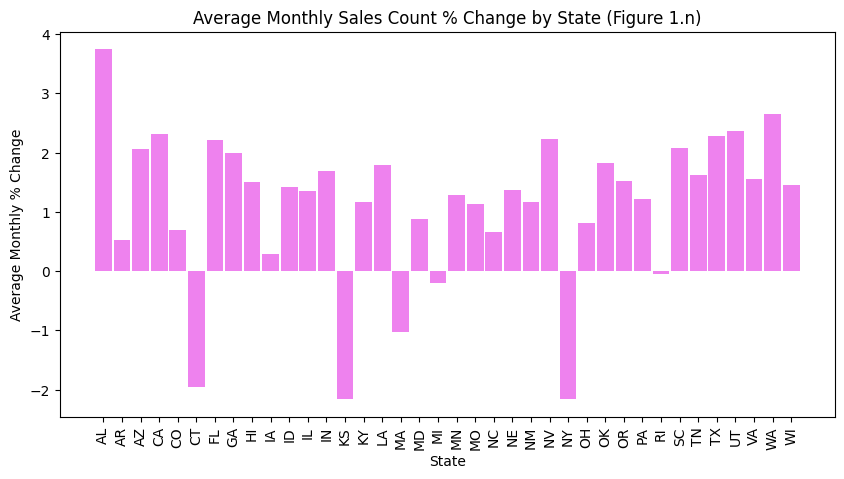

The state with the highest average month over month sales count increase is AL with a value of %3.7450273833066805


AL    3.745027
WA    2.645206
UT    2.361392
CA    2.312078
TX    2.285829
NV    2.223808
FL    2.212036
SC    2.087373
AZ    2.063037
GA    1.989666
OK    1.831147
LA    1.787848
IN    1.688620
TN    1.622606
VA    1.548715
OR    1.530395
HI    1.508932
WI    1.461308
ID    1.421019
NE    1.369934
IL    1.345907
MN    1.287355
PA    1.214189
NM    1.172664
KY    1.160572
MO    1.133538
MD    0.880507
OH    0.805117
CO    0.695997
NC    0.665564
AR    0.527836
IA    0.290204
RI   -0.047300
MI   -0.194900
MA   -1.028370
CT   -1.962780
KS   -2.162042
NY   -2.164296
dtype: float64

In [ ]:
df = sales_count_all_df.copy()

cols = df.columns
cols_list = list(rental_cols)

date_cols = cols_list[5:]
category_cols = cols_list[4]
desired_cols = []
desired_cols.append(category_cols)
for item in date_cols:
  desired_cols.append(item)

new_df = df[desired_cols]

new_df = df[desired_cols]

state_df = new_df.groupby(by = 'StateName').median()
average_state_diff_dict = {}
state_diff_dict = {}
for s in state_df.index:
  counter = len(date_cols)-1
  row =state_df.loc[s]
  diff_list = []

  while counter > 0:


    percent_diff_month_to_month = ((row[counter] - row[counter -1])/row[counter]) * 100
    diff_list.append(percent_diff_month_to_month)


    counter -=1
  diff_array = np.array(diff_list)
  state_diff_dict[s] = diff_array
  average_state_diff_dict[s] = diff_array.mean()



state_series = pd.Series(average_state_diff_dict)
x = state_series.index
y = state_series.values



fig = plt.figure(figsize = (10, 5))


best_month_over_month_state = state_series.idxmax()
percent_change_best_month_over_month = state_series.max()




plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Average Monthly % Change")
plt.title("Average Monthly Sales Count % Change by State (Figure 1.n)")
plt.show()

print(f"The state with the highest average month over month sales count increase is {best_month_over_month_state} with a value of %{percent_change_best_month_over_month}")
display(state_series.sort_values(ascending=False))
month_sales_count = state_series.sort_values(ascending=False)

# Average Rolling 12 month Sales Count By State




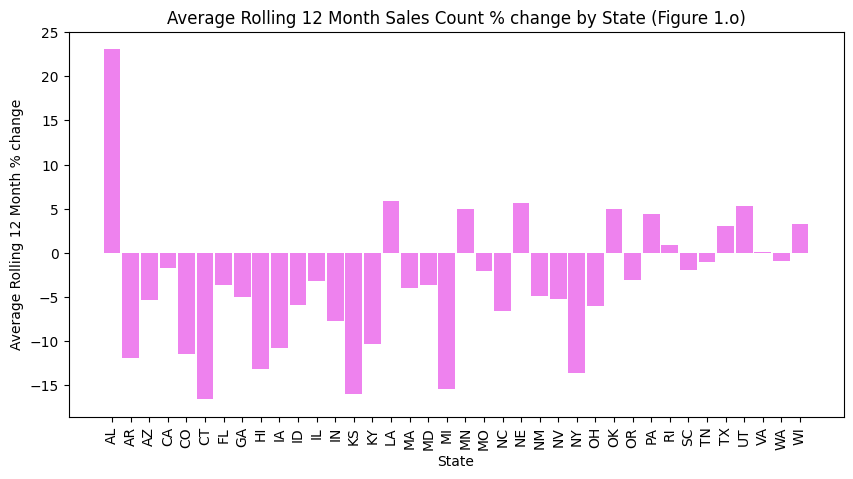

The state with the highest average month over month sales count increase is AL with a value of %23.05173542894564


AL    23.051735
LA     5.879121
NE     5.603985
UT     5.322129
OK     4.964539
MN     4.907975
PA     4.347826
WI     3.312028
TX     3.043889
RI     0.889328
VA     0.084388
WA    -0.883490
TN    -0.997506
CA    -1.668302
SC    -1.974724
MO    -2.059134
OR    -3.117939
IL    -3.241000
MD    -3.605769
FL    -3.656744
MA    -3.963415
NM    -4.871795
GA    -5.029620
NV    -5.224826
AZ    -5.363282
ID    -5.859375
OH    -6.072673
NC    -6.583072
IN    -7.715582
KY   -10.322581
IA   -10.820452
CO   -11.512845
AR   -11.957672
HI   -13.147914
NY   -13.595166
MI   -15.382215
KS   -16.014235
CT   -16.604245
dtype: float64

In [ ]:

average_state_diff_dict = {}
state_diff_dict = {}
for s in state_df.index:
  counter = len(date_cols)-1
  row =state_df.loc[s]
  diff_list = []

  while counter > 0:


    percent_diff_annual = ((row[-1] - row[-1 - 12])/ row[-1 - 12]) * 100
    diff_list.append(percent_diff_annual)

    counter -=1
  diff_array = np.array(diff_list)
  state_diff_dict[s] = diff_array
  average_state_diff_dict[s] = diff_array.mean()


state_series = pd.Series(average_state_diff_dict)
x = state_series.index
y = state_series.values



fig = plt.figure(figsize = (10, 5))


best_month_over_month_state = state_series.idxmax()
percent_change_best_month_over_month = state_series.max()




plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Average Rolling 12 Month % change")
plt.title("Average Rolling 12 Month Sales Count % change by State (Figure 1.o)")
plt.show()

print(f"The state with the highest average month over month sales count increase is {best_month_over_month_state} with a value of %{percent_change_best_month_over_month}")
display(state_series.sort_values(ascending=False))

monthly_sales_count = state_series.sort_values(ascending=False)

# Average Monthly Days on Market % Change by State

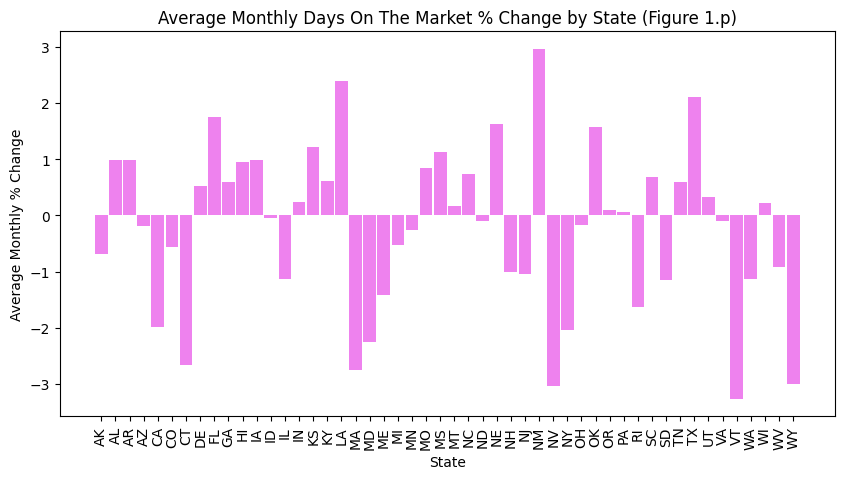

The state with the greatest average month over month days on the market decrease is VT with a value of %-3.2660436040604557


VT   -3.266044
NV   -3.041154
WY   -3.002738
MA   -2.749519
CT   -2.656824
MD   -2.249307
NY   -2.038901
CA   -1.978523
RI   -1.625099
ME   -1.413714
SD   -1.144445
WA   -1.135004
IL   -1.132632
NJ   -1.036730
NH   -1.001152
WV   -0.925523
AK   -0.684893
CO   -0.560610
MI   -0.526276
MN   -0.253581
AZ   -0.180337
OH   -0.177374
ND   -0.099627
VA   -0.094106
ID   -0.037413
PA    0.066975
OR    0.098317
MT    0.170216
WI    0.229476
IN    0.237050
UT    0.326206
DE    0.518130
TN    0.594631
GA    0.596381
KY    0.604549
SC    0.686670
NC    0.728308
MO    0.849902
HI    0.951854
AL    0.979020
AR    0.981757
IA    0.989626
MS    1.124421
KS    1.225507
OK    1.567082
NE    1.623865
FL    1.743048
TX    2.109678
LA    2.396136
NM    2.961489
dtype: float64

In [ ]:
df = days_on_market_all_df.copy()

cols = df.columns
cols_list = list(rental_cols)

date_cols = cols_list[5:]
category_cols = cols_list[4]
desired_cols = []
desired_cols.append(category_cols)
for item in date_cols:
  desired_cols.append(item)

new_df = df[desired_cols]

new_df = df[desired_cols]

state_df = new_df.groupby(by = 'StateName').median()
average_state_diff_dict = {}
state_diff_dict = {}
for s in state_df.index:
  counter = len(date_cols)-1
  row =state_df.loc[s]
  diff_list = []

  while counter > 0:


    percent_diff_month_to_month = ((row[counter] - row[counter -1])/row[counter]) * 100
    diff_list.append(percent_diff_month_to_month)

    counter -=1
  diff_array = np.array(diff_list)
  state_diff_dict[s] = diff_array
  average_state_diff_dict[s] = diff_array.mean()



state_series = pd.Series(average_state_diff_dict)
x = state_series.index
y = state_series.values


y_month_days_on_market = state_series.values
fig = plt.figure(figsize = (10, 5))


best_month_over_month_state = state_series.idxmin()
percent_change_best_month_over_month = state_series.min()



plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Average Monthly % Change")
plt.title("Average Monthly Days On The Market % Change by State (Figure 1.p)")
plt.show()

print(f"The state with the greatest average month over month days on the market decrease is {best_month_over_month_state} with a value of %{percent_change_best_month_over_month}")
display(state_series.sort_values(ascending = True))
average_month_days_on_market = state_series.sort_values(ascending = True)


# Rolling 12 Month Days on Market % Change by State

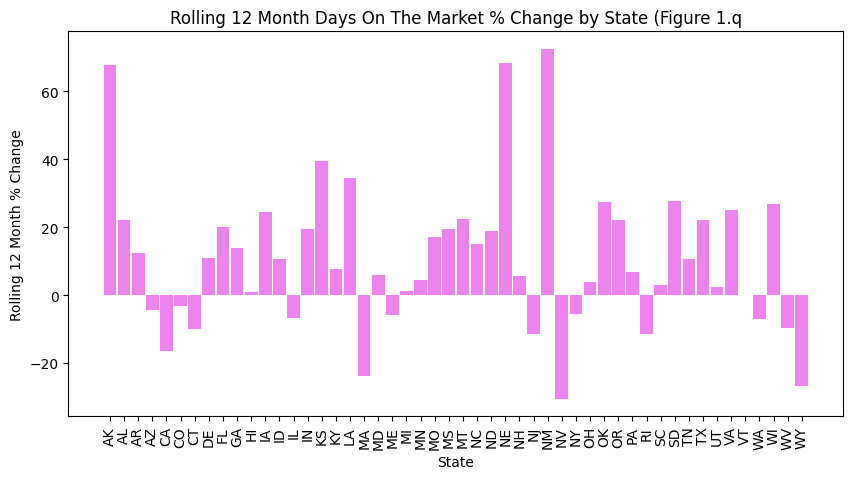

The state with the greatest average month over month days on the market decrease is NV with a value of %-30.55555555555555


NV   -30.555556
WY   -26.708075
MA   -23.684211
CA   -16.326531
RI   -11.428571
NJ   -11.403509
CT   -10.000000
WV    -9.565217
WA    -7.142857
IL    -6.666667
ME    -5.747126
NY    -5.454545
AZ    -4.411765
CO    -3.305785
VT     0.000000
HI     0.847458
MI     1.136364
UT     2.307692
SC     2.884615
OH     3.797468
MN     4.545455
NH     5.714286
MD     5.882353
PA     6.976744
KY     7.692308
ID    10.569106
TN    10.784314
DE    10.843373
AR    12.280702
GA    13.978495
NC    15.000000
MO    17.021277
ND    18.867925
MS    19.387755
IN    19.444444
FL    20.000000
TX    22.047244
OR    22.222222
AL    22.222222
MT    22.330097
IA    24.444444
VA    25.000000
WI    26.829268
OK    27.450980
SD    27.631579
LA    34.513274
KS    39.436620
AK    67.741935
NE    68.253968
NM    72.500000
dtype: float64

In [ ]:

average_state_diff_dict = {}
state_diff_dict = {}
for s in state_df.index:
  counter = len(date_cols)-1
  row =state_df.loc[s]
  diff_list = []

  while counter > 0:

    percent_diff_annual = ((row[-1] - row[-1 - 12])/ row[-1 - 12]) * 100
    diff_list.append(percent_diff_annual)


    counter -=1
  diff_array = np.array(diff_list)
  state_diff_dict[s] = diff_array

  average_state_diff_dict[s] = diff_array.mean()



state_series = pd.Series(average_state_diff_dict)
x = state_series.index
y = state_series.values


y_rolling_12_month_days_on_market = state_series.values
fig = plt.figure(figsize = (10, 5))


best_month_over_month_state = state_series.idxmin()
percent_change_best_month_over_month = state_series.min()




plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Rolling 12 Month % Change")
plt.title("Rolling 12 Month Days On The Market % Change by State (Figure 1.q")
plt.show()

print(f"The state with the greatest average month over month days on the market decrease is {best_month_over_month_state} with a value of %{percent_change_best_month_over_month}")
display(state_series.sort_values(ascending = True))
rolling_12_month_days_on_market = state_series.sort_values(ascending = True)


# State Series and DataFrames


In [ ]:
def series_to_df(my_series, val):

  my_new_series = my_series.copy()
  index_list = []
  value_list = []
  my_dict = {}
  for (i, v) in zip(my_series.index, my_series.values):
    index_list.append(i)
    value_list.append(v)
  my_dict['StateName'] = index_list
  my_dict[val] = value_list
  df = pd.DataFrame(my_dict)
  print(type(df))
  return df




In [ ]:
def add_rank_column(my_df, val):
  cols = my_df.columns
  c = cols[1]

  my_df[val] = my_df[c].rank(ascending=False)
  return my_df

In [ ]:
df1 = average_home_value_monthly_change

df2 = average_home_value_annual_change


df3 = rolling_12_month_days_on_market.copy()

df4 = average_month_days_on_market.copy()


t3 = month_sales_count.copy()


df5 = monthly_rent_change.copy()

df6 = rolling_12_month_rent_change.copy()

df_list = [df1, df2, df3, df4, df5, df6]
df_val = ['Rank 1:home_value_monthly_change', 'Rank 2:average_home_value_rolling_12_month_change', 'Rank 3:rolling_12_month_days_on_market',
          'Rank 4:average_month_days_on_market', 'Rank 5:monthly_rent_change', 'Rank 6:rolling_12_month_rent_change']

df_name = ['average_home_value_monthly_change: Value', 'average_home_value_annual_change: Value', 'rolling_12_month_days_on_market: Value', 'average_month_days_on_market: Value', 'monthly_rent_change: Value', 'rolling_12_month_rent_change']


df1 = series_to_df(df_list[0], df_name[0])
df1 = add_rank_column(df1, df_val[0])

df2 = series_to_df(df_list[1], df_name[1])
df2 = add_rank_column(df2, df_val[1])

df3 = series_to_df(df_list[2], df_name[2])
df3 = add_rank_column(df3, df_val[2])

df4 = series_to_df(df_list[3], df_name[3])
df4 = add_rank_column(df4, df_val[3])

df5 = series_to_df(df_list[4], df_name[4])
df5 = add_rank_column(df5, df_val[4])

df6 = series_to_df(df_list[5], df_name[5])
df6 = add_rank_column(df6, df_val[5])




<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_list = [df1, df2, df3, df4, df5, df6]
merged_df = df1
counter = 1
while counter < len(df_list):
  merged_df = pd.merge(merged_df, df_list[counter], on = 'StateName')
  counter +=1


In [ ]:
columns_to_keep = ['StateName'] + [col for col in merged_df.columns if 'Rank' in col]
rank_df = merged_df[columns_to_keep]


# We have our state market trends ranked for several different categories, from that lets find our best state

In [ ]:
total = []
for index, row in rank_df.iterrows():
    total.append(row[1:].sum())

In [ ]:
rank_df['Total'] = total


<ipython-input-29-89c162e24d54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_df['Total'] = total


In [ ]:
ttest = rank_df.sort_values(by='Total', ascending = True)

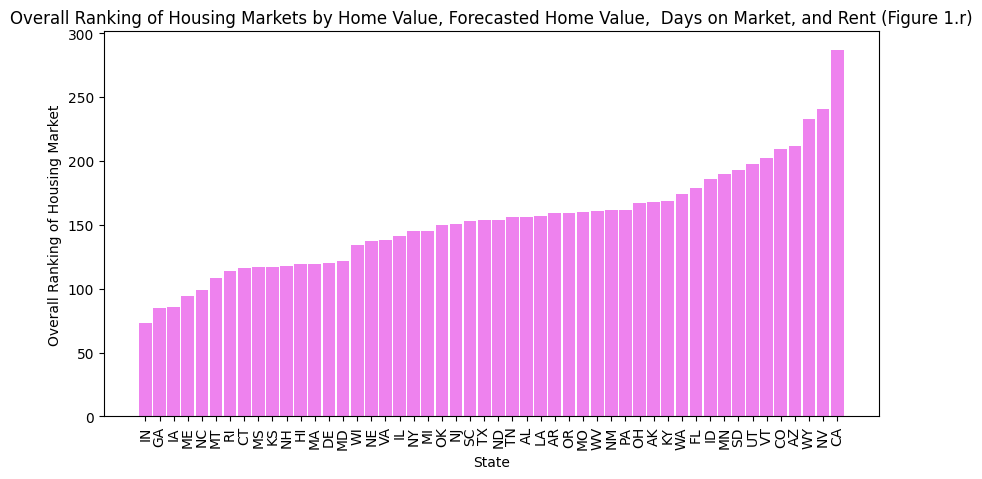

In [ ]:
x = ttest['StateName']
y = ttest['Total']

fig = plt.figure(figsize = (10, 5))



plt.bar(x, y, color = 'violet', width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Overall Ranking of Housing Market")
plt.title("Overall Ranking of Housing Markets by Home Value, Forecasted Home Value,  Days on Market, and Rent (Figure 1.r)")
plt.show()

In [ ]:
top_5 = ttest.head(5)
display(top_5)

,StateName,Rank 1:home_value_monthly_change,Rank 2:average_home_value_rolling_12_month_change,Rank 3:rolling_12_month_days_on_market,Rank 4:average_month_days_on_market,Rank 5:monthly_rent_change,Rank 6:rolling_12_month_rent_change,Total
9,IN,10.0,10.0,16.0,21.0,6.0,10.0,73.0
15,GA,16.0,22.0,21.0,17.0,5.0,4.0,85.0
17,IA,18.0,18.0,10.0,9.0,11.0,20.0,86.0
1,ME,2.0,1.0,40.0,41.0,4.0,6.0,94.0
14,NC,15.0,13.0,20.0,14.0,24.0,13.0,99.0


# Scott - Write Up Question 1
## Looking at the monthly percent change of home value, the rolling 12 month average percent change of home value, the rolling 12 month average percent change of days on market, the average monthly percent change days on market, the average monthly percent change for rent, and the rolling 12 month average percent change for rent and ranking all states based on those values as seen in (Figure 1.r) we can see that the best state market for housing is Indiana, followed by Georgia, then Iowa, then Maine and North Carolina.

#### The level of granulairity for my overall calculation of market is done at the state level. At the city/region level the only metrics I calculated were on Home Value Index and Forecasted Home Value index. Furthermore, the top states calculations are based off of the total rank scores as seen in the table below (Figure 1.r) and do not apply weight or significant importance to any one metric or ranking. (Figure 1.b, Figure 1.c, Figure 1.f, Figure 1.h, Figure 1.j, Figure 1.l, Figure 1.m, Figure 1.n, Figure 1.o, Figure 1.p, Figure 1.q) The following figures break down the rankings seen in (Figure 1.r) so that if the investor does put any weight or significance on a specifc metric they could refer to one or a combination of those figures to inform their investment decisions. In addition, it is important to note that the rankings for Figures (1.n and 1.o) were not used in determining overall ranking of states since they only had data on 38 states and not all 50 like the rest so in order to provide a fair ranking for all states they were not used in our overall evaluation of best state(s) but they can be used to aid in real estate investment overall.  

# Question 2: Are the sale prices and inventory listing going up or down overall in the US?

In [ ]:
for_sale_inventory_df = filtered_dataframes['ForSale - Inventory']
median_sale_price_df = filtered_dataframes['Sales -MedianSalesPrice']

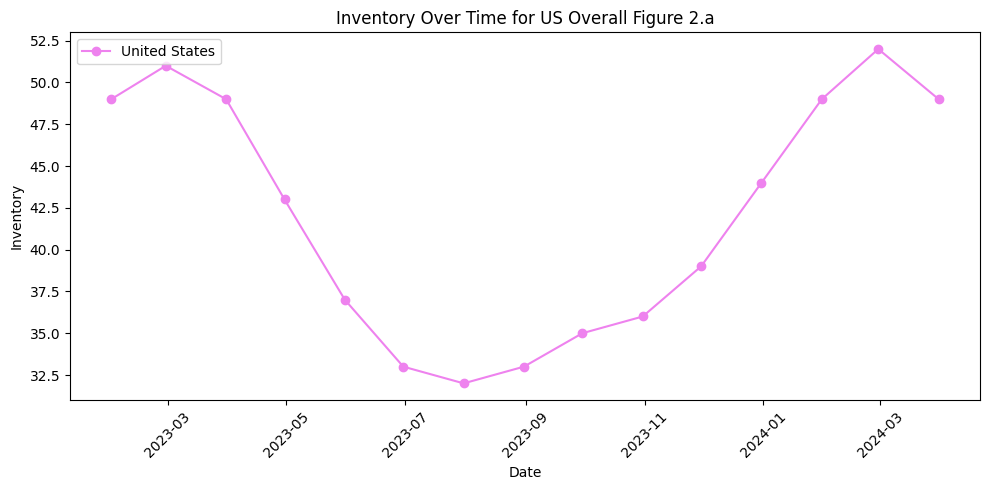

In [ ]:
inv_df = for_sale_inventory_df.copy()

US_inv_df = inv_df[inv_df['RegionName'] == 'United States']
plt.figure(figsize=(10, 5))

plt.plot(US_inv_df.columns[5:], US_inv_df.iloc[0, 5:], label='United States', color='violet', marker='o')

plt.title('Inventory Over Time for US Overall Figure 2.a')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Overall looks like the US inventory listing is going up

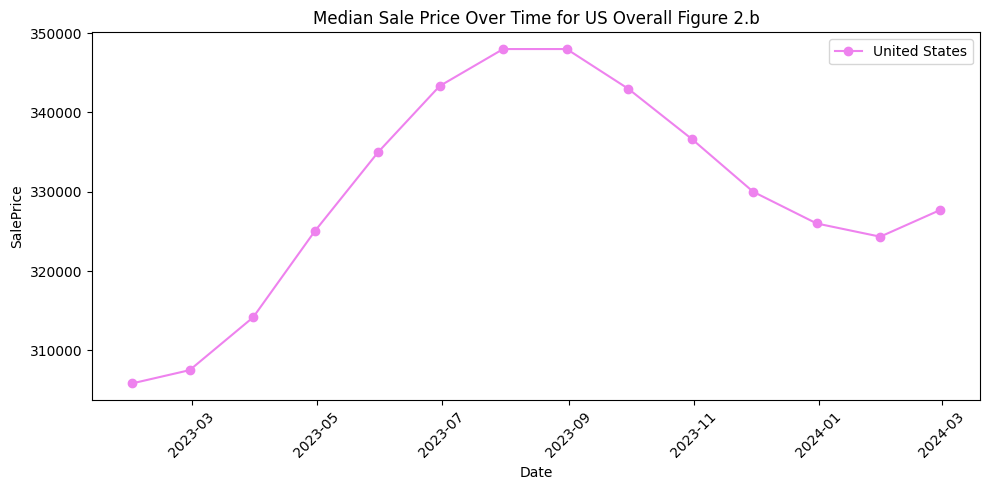

In [ ]:
med_sale_price = median_sale_price_df.copy()

US_med_sp = med_sale_price [med_sale_price ['RegionName'] == 'United States']
plt.figure(figsize=(10, 5))

plt.plot(US_med_sp .columns[5:], US_med_sp .iloc[0, 5:], label='United States', color='violet', marker='o')

plt.title('Median Sale Price Over Time for US Overall Figure 2.b')
plt.xlabel('Date')
plt.ylabel('SalePrice')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scott - Write Up Question 2
## Looking at (Figure 2.a) for US inventory, we can see that with the higher peak of US inventory in 2024 compared to 2023 and the rest of the values in 2024 tracking the same as 2023 that the overall inventory in the United States is increasing.

## Looking at (Figure 2.b) for US median sales price, we can see that the start of 2024 is much higher than the start of 2023. In addition, the sales price in 2024 is continuing to increase, so we can say that the median sales price of homes is increasing in the United States.


## Dula's code

# Question 3: Should I wait to invest or should I invest now and where. (You could recommend more than one place)?

In [ ]:

home_value_forecasts_df['Average Growth Rate'] = home_value_forecasts_df.iloc[:, 6:].mean(axis=1)
top_regions = home_value_forecasts_df.sort_values(by='Average Growth Rate', ascending=False)
print(top_regions[['RegionName', 'StateName', 'Average Growth Rate']].head())

                RegionName StateName  Average Growth Rate
714             Murray, KY        KY             4.433333
373          Kalispell, MT        MT             4.266667
810          Thomaston, GA        GA             4.133333
832  Steamboat Springs, CO        CO             3.866667
518         Crossville, TN        TN             3.233333


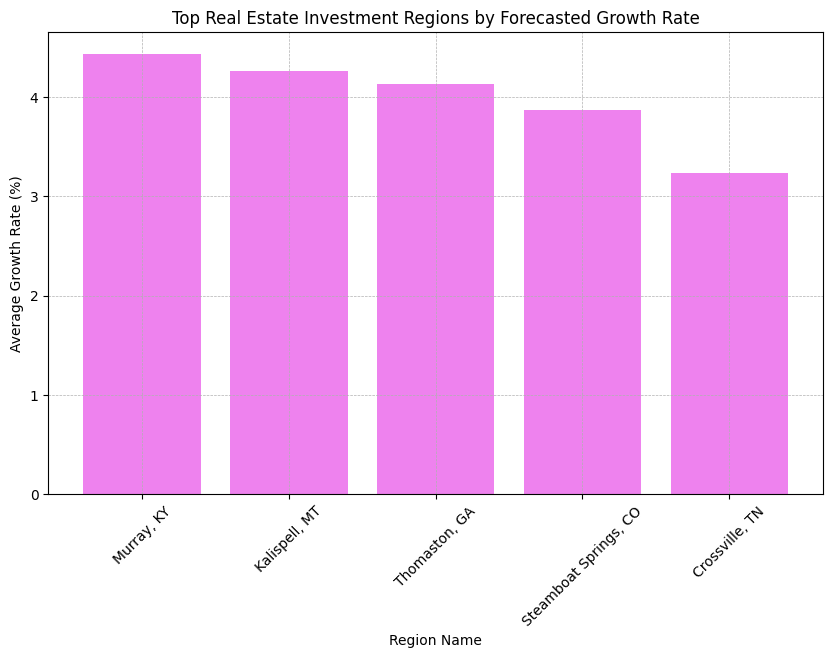

In [ ]:
regions = ['Murray, KY', 'Kalispell, MT', 'Thomaston, GA', 'Steamboat Springs, CO', 'Crossville, TN']
growth_rates = [4.433333, 4.266667, 4.133333, 3.866667, 3.233333]
plt.figure(figsize=(10, 6))
plt.bar(regions, growth_rates, color='violet')
plt.xlabel('Region Name')
plt.ylabel('Average Growth Rate (%)')
plt.title('Top Real Estate Investment Regions by Forecasted Growth Rate')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## summary about above graph

The graph shows the top five regions for real estate investment based on forecasted average growth rates from 2023 to 2025. Leading the list is Murray, KY, with a growth rate of approximately 4.43%, indicating a strong upward trend in property values and making it a prime location for investment. Kalispell, MT follows closely with a 4.27% growth rate, showing promising growth potential. Thomaston, GA, with a 4.13% growth rate, also demonstrates robust growth prospects. Steamboat Springs, CO has a 3.87% growth rate and offers good investment opportunities, particularly in vacation and seasonal rentals. Finally, Crossville, TN rounds out the top five with a 3.23% growth rate, presenting a stable investment option with consistent growth potential. Investing in these high-growth areas now could help investor capitalize on the anticipated property value appreciation, aligning with my strategy to maximize returns.

         RegionName StateName  Average Growth Rate
313   Johnstown, PA        PA            -4.266667
675      McComb, MS        MS            -3.966667
852  Clarksdale, MS        MS            -3.833333
894      Lamesa, TX        TX            -3.733333
427   Opelousas, LA        LA            -3.133333


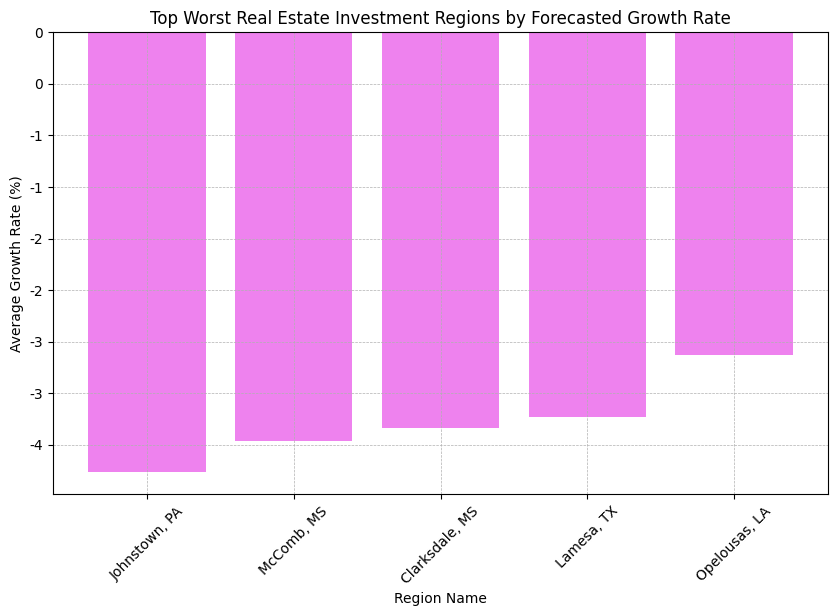

In [ ]:

worst_regions = home_value_forecasts_df.sort_values(by='Average Growth Rate', ascending=True)
print(worst_regions[['RegionName', 'StateName', 'Average Growth Rate']].head())

def y_format(tick_val, pos):
    return f'{int(tick_val)}'

regions = worst_regions['RegionName'].head().tolist()
growth_rates = worst_regions['Average Growth Rate'].head().tolist()

plt.figure(figsize=(10, 6))
plt.bar(regions, growth_rates, color='violet')
plt.xlabel('Region Name')
plt.ylabel('Average Growth Rate (%)')
plt.title('Top Worst Real Estate Investment Regions by Forecasted Growth Rate')
plt.xticks(rotation=45)
formatter = FuncFormatter(y_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## summary about above graph
The graph displays the bottom five regions for real estate investment based on forecasted average growth rates from 2023 to 2025. Dothan, AL, with the lowest growth rate of approximately 0.5%, indicates minimal property value appreciation, making it a less attractive option for investment. Gadsden, AL, follows closely with a 0.7% growth rate, also showing limited growth potential. Shreveport, LA, with a 0.8% growth rate, demonstrates low growth prospects, suggesting potential risks for real estate investors. Pine Bluff, AR, has a 0.9% growth rate, indicating limited potential for property value appreciation. Finally, Danville, IL, with a 1.0% growth rate, presents minimal growth potential, making it a less favorable investment option. Investing in these low-growth areas could pose higher risks and may not align with the investors goal to maximize returns through property value appreciation.

# Jeff's Code

# Question 4: Is the sqft price of the sale and listing in relation going up or down?

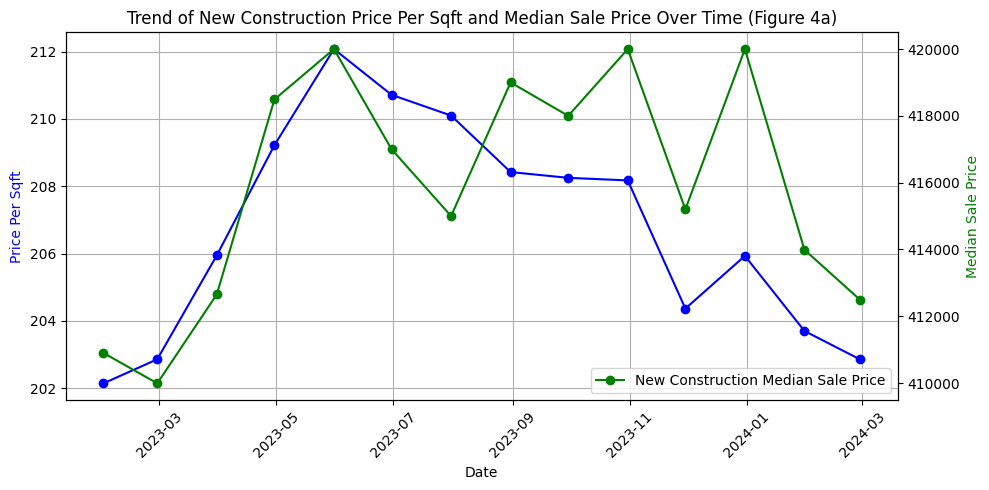

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(new_con_price_per_sqft_df.columns[5:], new_con_price_per_sqft_df.iloc[0, 5:], label='New Construction Price Per Sqft', color='blue', marker='o')

plt.xlabel('Date')
plt.ylabel('Price Per Sqft', color='blue')
plt.xticks(rotation=45)
plt.grid(True)

ax2 = plt.gca().twinx()


plt.plot(new_con_median_sale_price_df.columns[5:], new_con_median_sale_price_df.iloc[0, 5:], label='New Construction Median Sale Price', color='green', marker='o')

plt.ylabel('Median Sale Price', color='green')
plt.title('Trend of New Construction Price Per Sqft and Median Sale Price Over Time (Figure 4a)')

lines, labels = plt.gca().get_legend_handles_labels()
plt.legend(lines, labels)

plt.tight_layout()
plt.show()

In [ ]:
new_con_price_per_sqft_df.columns = new_con_price_per_sqft_df.columns.astype(str)

median_price_per_sqft_df = new_con_price_per_sqft_df.groupby('StateName')['2023-01-31 00:00:00'].median().sort_values(ascending=False)
top_5_states_sqft = median_price_per_sqft_df.head(5)
cheapest_median_price_per_sqft_df = new_con_price_per_sqft_df.groupby('StateName')['2023-01-31 00:00:00'].median().sort_values()
cheapest_median_price_per_sqft= cheapest_median_price_per_sqft_df.head(5)

print("Top 5 Most Expensive States based on Median Price Per Sqft:")
print(top_5_states_sqft)
print("Cheapest 5 States based on Price Per sqft:")
print(cheapest_median_price_per_sqft)
new_con_median_sale_price_df.columns = new_con_median_sale_price_df.columns.astype(str)

top_5_states_new_con_sale_df = new_con_median_sale_price_df.groupby('StateName')['2023-01-31 00:00:00'].median().sort_values(ascending=False)

top_5_states_new_con_sale = top_5_states_new_con_sale_df.head(5)

print("Top 5 Most Expensive States based on Median Sale Price:")
print(top_5_states_new_con_sale)

cheapest_5_states_new_con_sale_df = new_con_median_sale_price_df.groupby('StateName')['2023-01-31 00:00:00'].median().sort_values()
cheapest_5_states_new_con_sale = cheapest_5_states_new_con_sale_df.head(5)

print("Cheapest 5 States based on Median Sale Price:")
print(cheapest_5_states_new_con_sale)

Top 5 Most Expensive States based on Median Price Per Sqft:
StateName
MA    384.750000
NY    377.104377
CA    367.765485
ME    354.107649
WA    326.432255
Name: 2023-01-31 00:00:00, dtype: float64
Cheapest 5 States based on Price Per sqft:
StateName
MS    152.777778
LA    155.504727
IN    168.178607
AL    169.529116
OK    174.045360
Name: 2023-01-31 00:00:00, dtype: float64
Top 5 Most Expensive States based on Median Sale Price:
StateName
NY    800000.0
MA    684910.5
ME    595000.0
WA    593500.0
CA    588340.0
Name: 2023-01-31 00:00:00, dtype: float64
Cheapest 5 States based on Median Sale Price:
StateName
LA    280000.00
TX    323678.75
MS    332450.00
OK    332920.00
SC    334525.00
Name: 2023-01-31 00:00:00, dtype: float64


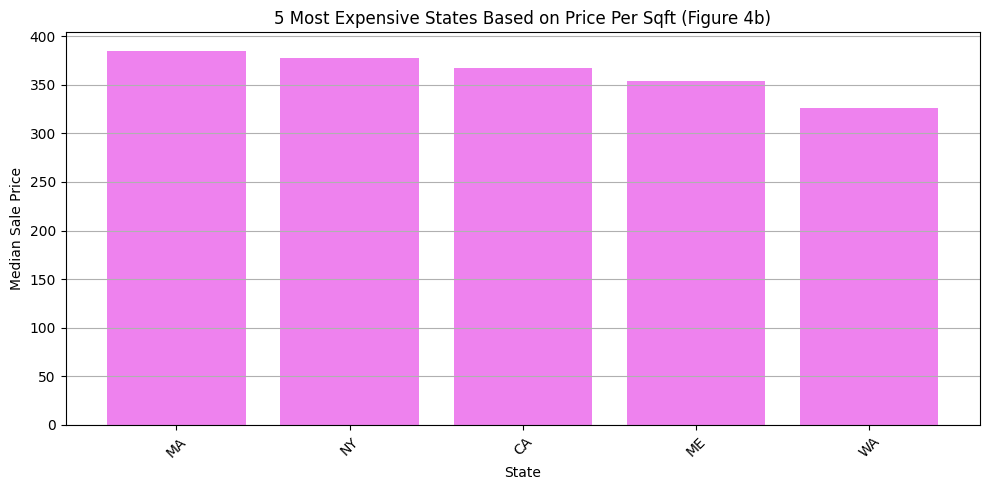

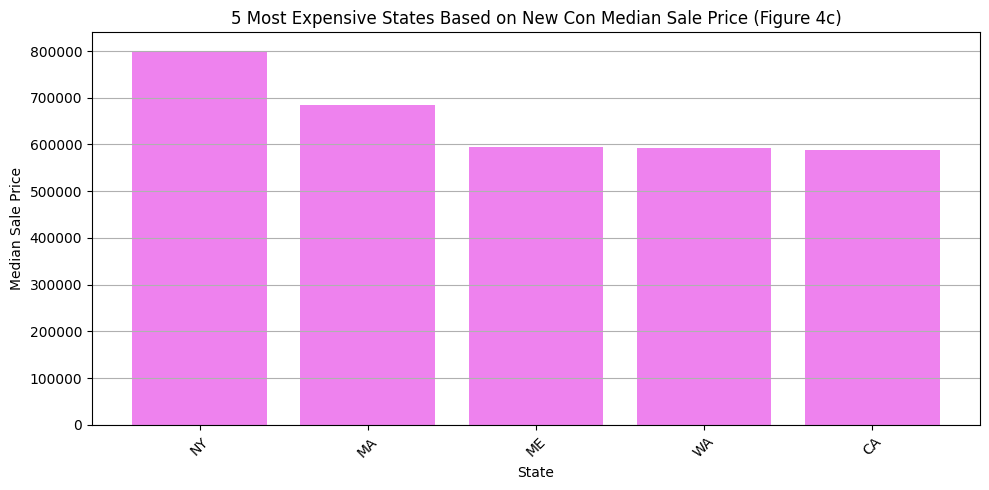

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(top_5_states_sqft.index, top_5_states_sqft.values, color='Violet')
plt.xlabel('State')
plt.ylabel('Median Sale Price')
plt.title('5 Most Expensive States Based on Price Per Sqft (Figure 4b)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(top_5_states_new_con_sale.index, top_5_states_new_con_sale.values, color='Violet')
plt.xlabel('State')
plt.ylabel('Median Sale Price')
plt.title('5 Most Expensive States Based on New Con Median Sale Price (Figure 4c)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

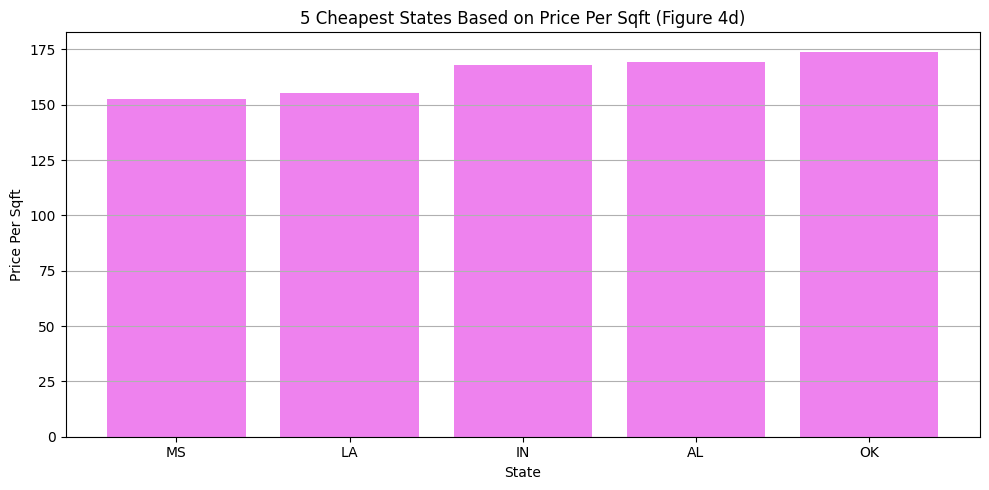

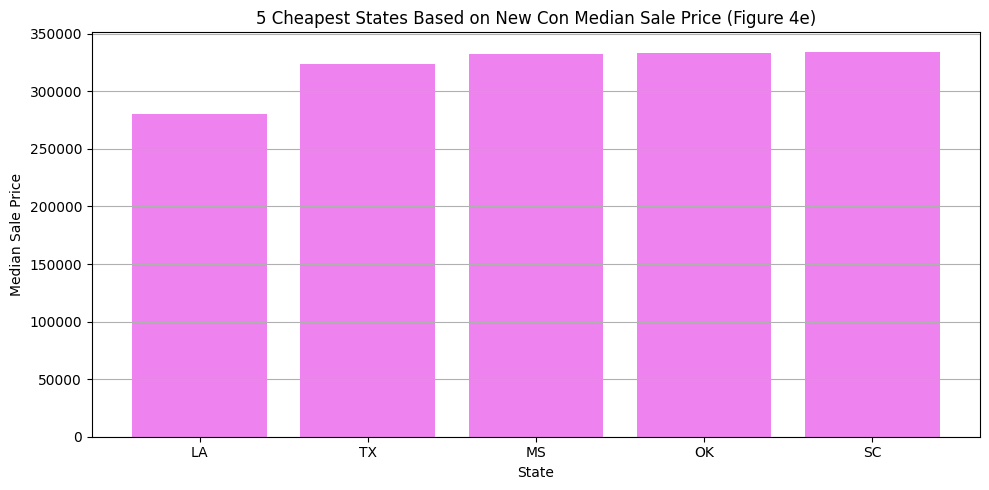

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(cheapest_median_price_per_sqft.index, cheapest_median_price_per_sqft.values, color='Violet')
plt.xlabel('State')
plt.ylabel('Price Per Sqft')
plt.title('5 Cheapest States Based on Price Per Sqft (Figure 4d)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(cheapest_5_states_new_con_sale.index, cheapest_5_states_new_con_sale.values, color='Violet')
plt.xlabel('State')
plt.ylabel('Median Sale Price')
plt.title('5 Cheapest States Based on New Con Median Sale Price (Figure 4e)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-43-12c35e19d0ad>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(median_sale_price.index)


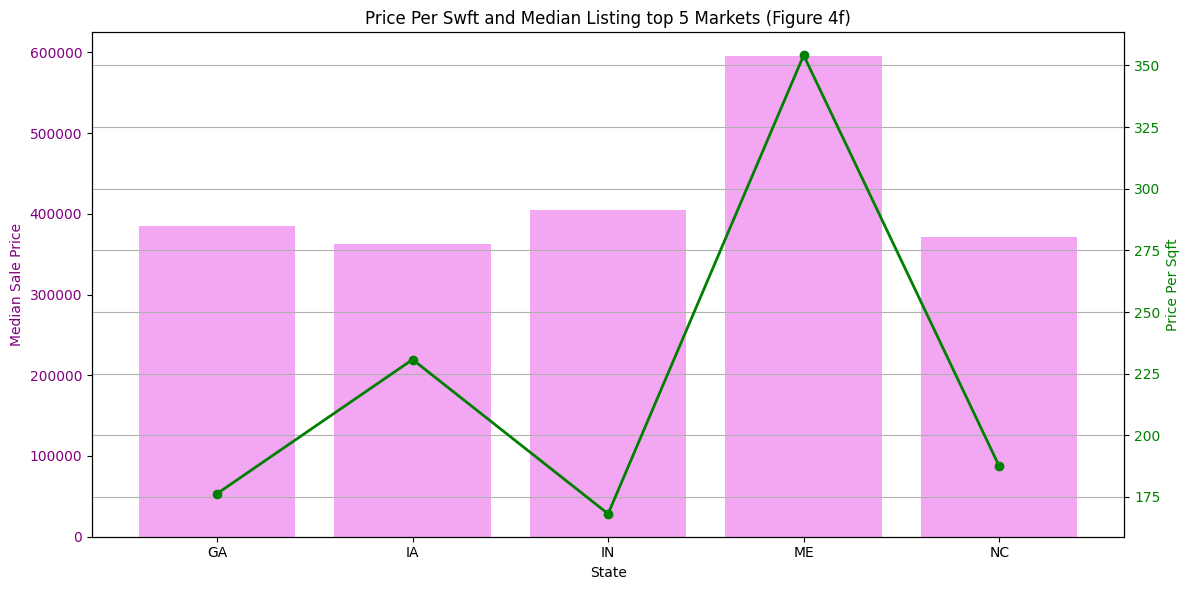

In [ ]:
states = ['IN', 'GA', 'IA', 'ME', 'NC']


selected_states_sale = new_con_median_sale_price_df[new_con_median_sale_price_df['StateName'].isin(states)]
selected_states_sqft = new_con_price_per_sqft_df[new_con_price_per_sqft_df['StateName'].isin(states)]


median_sale_price = selected_states_sale.groupby('StateName')['2023-01-31 00:00:00'].median()
median_price_per_sqft = selected_states_sqft.groupby('StateName')['2023-01-31 00:00:00'].median()


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.bar(median_sale_price.index, median_sale_price.values, color='violet', alpha=0.7, label='Median Sale Price')
ax1.set_xlabel('State')
ax1.set_ylabel('Median Sale Price', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_xticklabels(median_sale_price.index)


ax2 = ax1.twinx()
ax2.plot(median_price_per_sqft.index, median_price_per_sqft.values, color='green', marker='o', linestyle='-', linewidth=2, label='Price Per Sqft')
ax2.set_ylabel('Price Per Sqft', color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.title('Price Per Swft and Median Listing top 5 Markets (Figure 4f)')
fig.tight_layout()
plt.grid(axis='y')


plt.show()

##### Looking over figure 4a we can see that overall the price per sqft and median listing are both trending downwards . Figure 4b and c shows us the top 5 most expensive states based on new construction price per sqft. Figure 4d and e show us the cheapest based on new construction price per sqft. The price per sqft and median listing trends tend to follow eachother closely. Figure 4f shows us the top 5 states median new construction listings and their respected price per sqft.

# Question 5: How long some of the houses are on the market before they rent or sell?

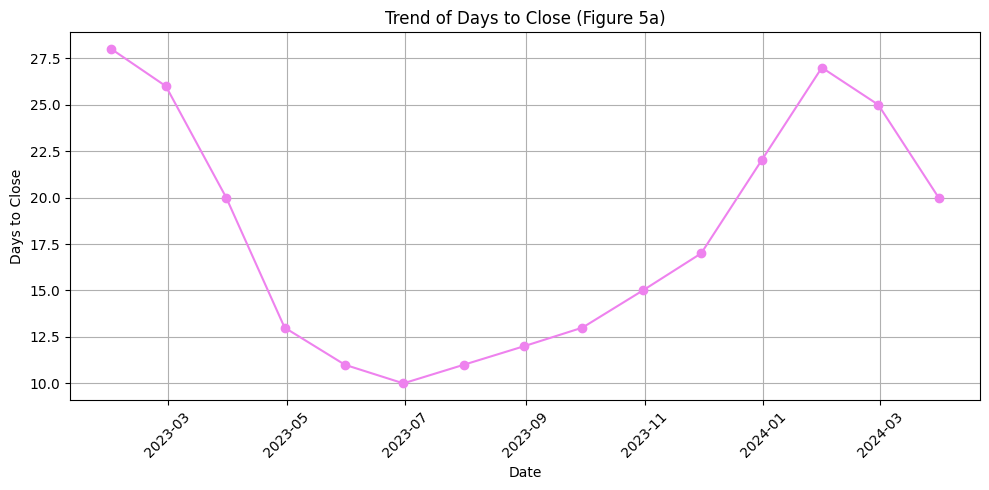

Average Days to Close: 18.00


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(days_on_market_days_to_close_df.columns[5:], days_on_market_days_to_close_df.iloc[0, 5:], marker='o', color = 'violet')

plt.xlabel('Date')
plt.ylabel('Days to Close')
plt.title('Trend of Days to Close (Figure 5a)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

average_days_to_close = days_on_market_days_to_close_df.iloc[0, 5:].mean()
print(f'Average Days to Close: {average_days_to_close:.2f}')

###### Looking at the median days to close (Figure 5a), the average days to close overall is 18 days. This graph also follows the trend of Figure 2a, as inventory levels drop, or rise, the length a house is on the market follows respectivly.

Scotts Code

'Sales - CountAll', 'Sales -MedianSalesPrice', 'HomeValuesForcasts', 'HomeValues - All', 'Rentals - All', 'ForSale - Inventory', 'DaysOnMarket - All', 'DaysOnMarket - DaysToClose', 'NewCon - PricePerSqft', 'NewCon - All', 'NewCon - MedianSalesPrice']


In [ ]:
days_on_market_all_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00
0,102001,0,United States,country,NaN,49.0,51.0,49.0,43.0,37.0,33.0,32.0,33.0,35.0,36.0,39.0,44.0,49.0,52.0,49
1,394913,1,"New York, NY",msa,NY,72.0,76.0,73.0,65.0,58.0,54.0,54.0,55.0,56.0,56.0,57.0,61.0,68.0,71.0,67
2,753899,2,"Los Angeles, CA",msa,CA,50.0,52.0,49.0,42.0,35.0,31.0,29.0,29.0,30.0,31.0,33.0,36.0,40.0,41.0,37
3,394463,3,"Chicago, IL",msa,IL,50.0,52.0,46.0,37.0,30.0,26.0,24.0,25.0,26.0,27.0,30.0,36.0,42.0,43.0,38
4,394514,4,"Dallas, TX",msa,TX,46.0,49.0,45.0,37.0,30.0,27.0,28.0,31.0,34.0,37.0,40.0,45.0,51.0,52.0,49


In [ ]:
home_value_all_df = filtered_dataframes['HomeValues - All']
home_value_all_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00
0,102001,0,United States,country,NaN,341188.538880,340314.670345,340252.905450,341221.528289,342854.490715,344800.668571,346556.265650,348185.384600,349416.191393,350337.210517,350989.680382,351422.680045,351853.570519,352643.211082,354178.895503
1,394913,1,"New York, NY",msa,NY,606946.222475,605589.315823,605904.711799,607912.661841,611943.050954,616112.961817,619715.298726,623014.744681,625741.617408,628088.794927,630401.202991,633164.954066,636049.823869,640088.289589,645484.992262
2,753899,2,"Los Angeles, CA",msa,CA,909948.310151,898544.349120,888329.721874,885843.544784,889800.113164,897954.530396,909676.914946,923859.988980,938180.569927,950095.413757,959061.991630,964692.569762,964853.271329,961763.207758,960594.484153
3,394463,3,"Chicago, IL",msa,IL,292303.610104,292150.318007,292794.473161,294484.842397,296674.274596,299233.179363,301772.486784,304224.279696,306051.676425,307412.217507,308323.993034,308956.619133,309614.644858,310995.446505,313395.694815
4,394514,4,"Dallas, TX",msa,TX,377887.302256,375588.753443,374029.523947,373469.897080,373760.010197,374590.235758,375581.683736,376517.216607,376938.395031,377054.586318,376913.810144,376583.049504,376605.012932,377093.204415,378265.329163


### Meenu's code

# Question 6: How much average profit I could expect from my investments in terms of rent after paying mortgage. Calculate my ~ROI.

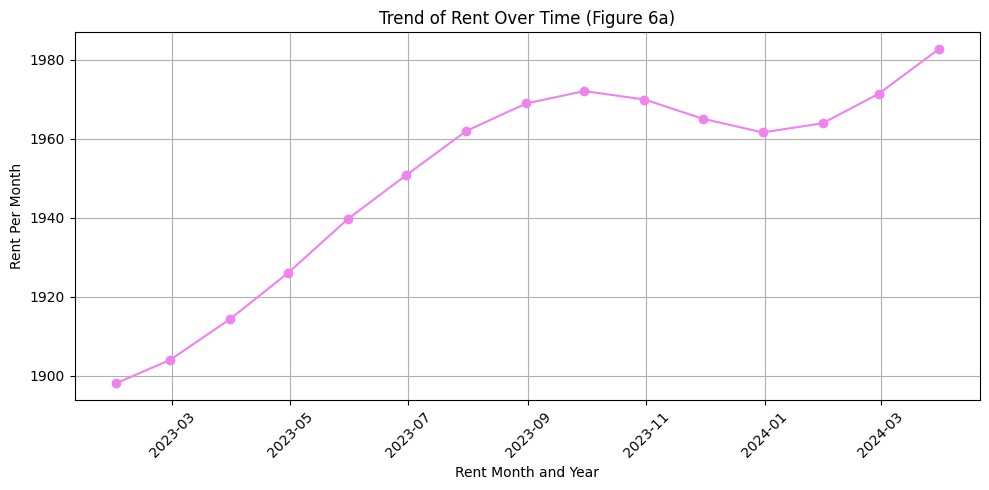

In [ ]:
rent_per_month = filtered_dataframes['Rentals - All']
plt.figure(figsize=(10, 5))
plt.plot(rent_per_month.columns[5:], rent_per_month.iloc[0, 5:], marker='o',color='violet')

plt.xlabel('Rent Month and Year')
plt.ylabel('Rent Per Month')
plt.title('Trend of Rent Over Time (Figure 6a)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

For the rent dataset from January 2023 to October 2023, the rent was continuously increasing but during the time period from November 2023 to January 2024 there was a drop in the monthly rent but again the rent started increasing in Februray 2024 (Figure 6a).

In [ ]:
rental_copy = rental_all_df.copy()

rental_copy.columns = rental_copy.columns.astype(str)

rental_copy.rename(columns=lambda x: x.replace(' 00:00:00', ''), inplace=True)

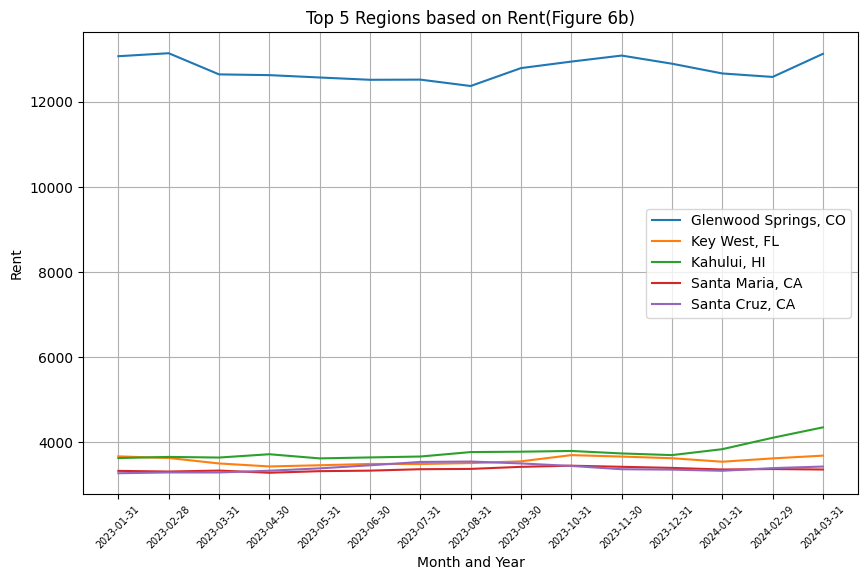

In [ ]:
median_rent_values = rental_copy.groupby('RegionName')['2023-01-31'].median().sort_values(ascending=False)


top_5_rent_regions = median_rent_values.head(5).index
region_name = list(top_5_rent_regions)

plt.figure(figsize=(10,6))
for region in region_name:
    df = rental_copy.loc[rental_copy['RegionName'] == region]

    plt.plot(df.columns[5:], df.iloc[0, 5:], label=region)
    plt.xticks(rotation=45, fontweight='light',  fontsize='x-small')

plt.title('Top 5 Regions based on Rent(Figure 6b)')
plt.xlabel('Month and Year')
plt.ylabel('Rent')
plt.legend()
plt.grid(True)
plt.show()

The above graph shows the top 5 regions based on the rent for month January 2024 and top one region with the highest rent amount is 'Glenwood Springs, CO'(Figure 6b).

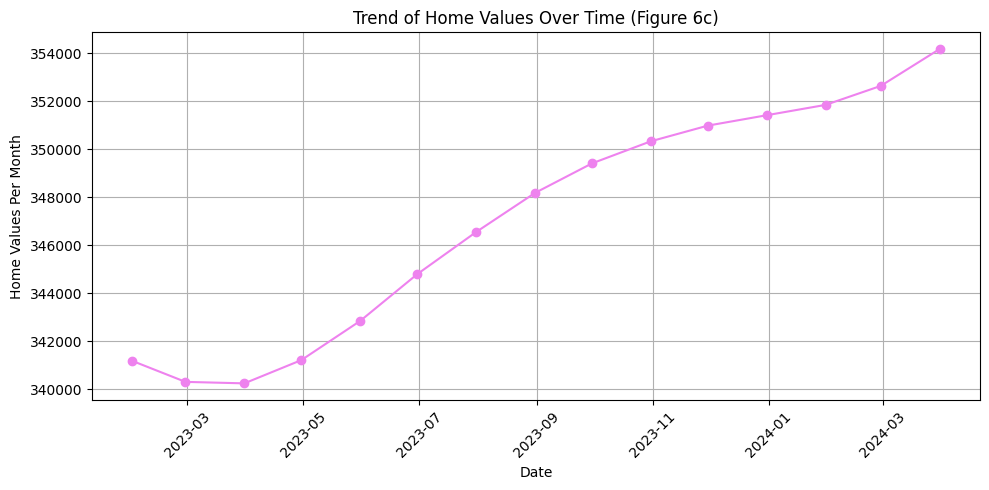

In [ ]:
home_value_all_df = filtered_dataframes['HomeValues - All']

plt.figure(figsize=(10, 5))
plt.plot(home_value_all_df.columns[5:], home_value_all_df.iloc[0, 5:], marker='o', color='violet')

plt.xlabel('Date')
plt.ylabel('Home Values Per Month')
plt.title('Trend of Home Values Over Time (Figure 6c)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

For the home value dataset, the home value was continuously increasing from January 2023 to March 2024(Figure 6c).

In [ ]:
home_values_copy = home_value_all_df.copy()

home_values_copy.columns = home_values_copy.columns.astype(str)

home_values_copy.rename(columns=lambda x: x.replace(' 00:00:00', ''), inplace=True)

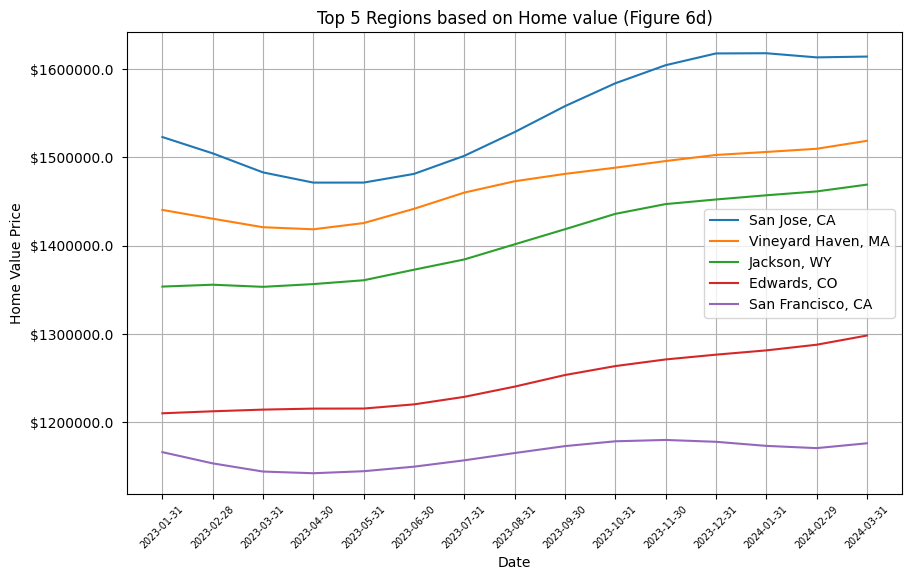

In [ ]:
home_values = home_values_copy.groupby('RegionName')['2023-01-31'].median().sort_values(ascending=False)

# Select the top 5 regions based on home values
top_5_home_regions = home_values.head(5).index
region_name = list(top_5_home_regions)

plt.figure(figsize=(10,6))
for region in region_name:
    df = home_values_copy.loc[home_values_copy['RegionName'] == region]
    plt.plot(df.columns[5:], df.iloc[0, 5:], label=region)
    plt.xticks(rotation=45, fontweight='light',  fontsize='x-small')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x} '))
plt.title('Top 5 Regions based on Home value (Figure 6d)')
plt.xlabel('Date')
plt.ylabel('Home Value Price')
plt.legend()
plt.grid(True)
plt.show()

The above graph shows top 5 regions based on the home values for month January 2024 and top one region with the highest median sales price is 'San Jose, CA'(Figure 6d).

In [ ]:

home_value_top_region = home_values_copy.groupby('RegionName')['2023-01-31'].median().sort_values(ascending=False)
regionname = home_value_top_region.head(1).index
home_value_price = float(home_values_copy.loc[home_values_copy['RegionName'].isin(regionname),'2023-01-31'].to_string(index=False))
rent_top_region = rental_copy.groupby('RegionName')['2023-01-31'].median().sort_values(ascending=False)
regionname = rent_top_region.head(1).index
month_rent = float(rental_copy.loc[rental_copy['RegionName'].isin(regionname),'2023-01-31'].to_string(index=False))

roi = (math.floor(month_rent)*12)/home_value_price*100
print('ROI for rental apartment can be approx {0}% '.format(round(roi,2)))
investment = 6000000
round_roi=round(roi,2)
average_profit = (investment*round_roi)/100
print('Average profit can be {0}'.format(round(average_profit,2)))

ROI for rental apartment can be approx 10.3% 
Average profit can be 618000.0


## Meenu's Write-up Question 6
## From my point of view, ROI can be approx 10.3% for rental apartment and average profit can be 618000.

# Question 7: How much average profit I could expect from my investments in terms of sales after upgrading properties, paying mortgage, and paying taxes. Calculate the ROI

In [ ]:
home_value_all_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00
0,102001,0,United States,country,NaN,341188.538880,340314.670345,340252.905450,341221.528289,342854.490715,344800.668571,346556.265650,348185.384600,349416.191393,350337.210517,350989.680382,351422.680045,351853.570519,352643.211082,354178.895503
1,394913,1,"New York, NY",msa,NY,606946.222475,605589.315823,605904.711799,607912.661841,611943.050954,616112.961817,619715.298726,623014.744681,625741.617408,628088.794927,630401.202991,633164.954066,636049.823869,640088.289589,645484.992262
2,753899,2,"Los Angeles, CA",msa,CA,909948.310151,898544.349120,888329.721874,885843.544784,889800.113164,897954.530396,909676.914946,923859.988980,938180.569927,950095.413757,959061.991630,964692.569762,964853.271329,961763.207758,960594.484153
3,394463,3,"Chicago, IL",msa,IL,292303.610104,292150.318007,292794.473161,294484.842397,296674.274596,299233.179363,301772.486784,304224.279696,306051.676425,307412.217507,308323.993034,308956.619133,309614.644858,310995.446505,313395.694815
4,394514,4,"Dallas, TX",msa,TX,377887.302256,375588.753443,374029.523947,373469.897080,373760.010197,374590.235758,375581.683736,376517.216607,376938.395031,377054.586318,376913.810144,376583.049504,376605.012932,377093.204415,378265.329163


In [ ]:
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_vars = home_value_all_df.columns.difference(id_vars)
melted_df = pd.melt(home_value_all_df, id_vars=id_vars, value_vars=date_vars, var_name='Date', value_name='Price')
melted_df['Date'] = pd.to_datetime(melted_df['Date'])
pivoted_df = melted_df.pivot_table(index=id_vars, columns='Date', values='Price').reset_index()
melted_df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
0,102001,0,United States,country,NaN,2023-01-31,341188.538880
1,394913,1,"New York, NY",msa,NY,2023-01-31,606946.222475
2,753899,2,"Los Angeles, CA",msa,CA,2023-01-31,909948.310151
3,394463,3,"Chicago, IL",msa,IL,2023-01-31,292303.610104
4,394514,4,"Dallas, TX",msa,TX,2023-01-31,377887.302256


In [ ]:
melted_df['Cost of Upgrades'] = melted_df['Price'] * 0.05 + melted_df['Price'] * 0.30 + melted_df['Price'] * 0.02
melted_df['Total Cost'] = melted_df['Price'] + melted_df['Cost of Upgrades']
melted_df['Forecast Value'] = melted_df['Price'] * 0.53 + melted_df['Price']
melted_df['Profit'] = melted_df['Forecast Value'] - melted_df['Total Cost']
melted_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price,Cost of Upgrades,Total Cost,Forecast Value,Profit
0,102001,0,United States,country,NaN,2023-01-31,341188.538880,126239.759386,4.674283e+05,5.220185e+05,54590.166221
1,394913,1,"New York, NY",msa,NY,2023-01-31,606946.222475,224570.102316,8.315163e+05,9.286277e+05,97111.395596
2,753899,2,"Los Angeles, CA",msa,CA,2023-01-31,909948.310151,336680.874756,1.246629e+06,1.392221e+06,145591.729624
3,394463,3,"Chicago, IL",msa,IL,2023-01-31,292303.610104,108152.335738,4.004559e+05,4.472245e+05,46768.577617
4,394514,4,"Dallas, TX",msa,TX,2023-01-31,377887.302256,139818.301835,5.177056e+05,5.781676e+05,60461.968361


In [ ]:
grouped_by_state = melted_df.groupby('StateName').agg({
    'RegionID': 'first',
    'SizeRank': 'first',
    'RegionName': 'first',
    'RegionType': 'first',
    'Price': 'sum',
    'Cost of Upgrades': 'sum',
    'Total Cost': 'sum',
    'Forecast Value': 'sum',
    'Profit': 'sum'
}).reset_index()

grouped_by_state_sorted = grouped_by_state.sort_values(by='Profit', ascending=False)
top_states_by_profit = grouped_by_state_sorted.head()
top_states_by_profit.head()

,StateName,RegionID,SizeRank,RegionName,RegionType,Price,Cost of Upgrades,Total Cost,Forecast Value,Profit
4,CA,753899,2,"Los Angeles, CA",msa,3.074775e+08,1.137667e+08,4.212441e+08,4.704405e+08,4.919640e+07
42,TX,394514,4,"Dallas, TX",msa,2.114341e+08,7.823063e+07,2.896648e+08,3.234942e+08,3.382946e+07
8,FL,394856,8,"Miami, FL",msa,1.573454e+08,5.821779e+07,2.155632e+08,2.407384e+08,2.517526e+07
26,NC,394458,23,"Charlotte, NC",msa,1.517943e+08,5.616389e+07,2.079582e+08,2.322453e+08,2.428709e+07
5,CO,394530,19,"Denver, CO",msa,1.487373e+08,5.503280e+07,2.037701e+08,2.275681e+08,2.379797e+07


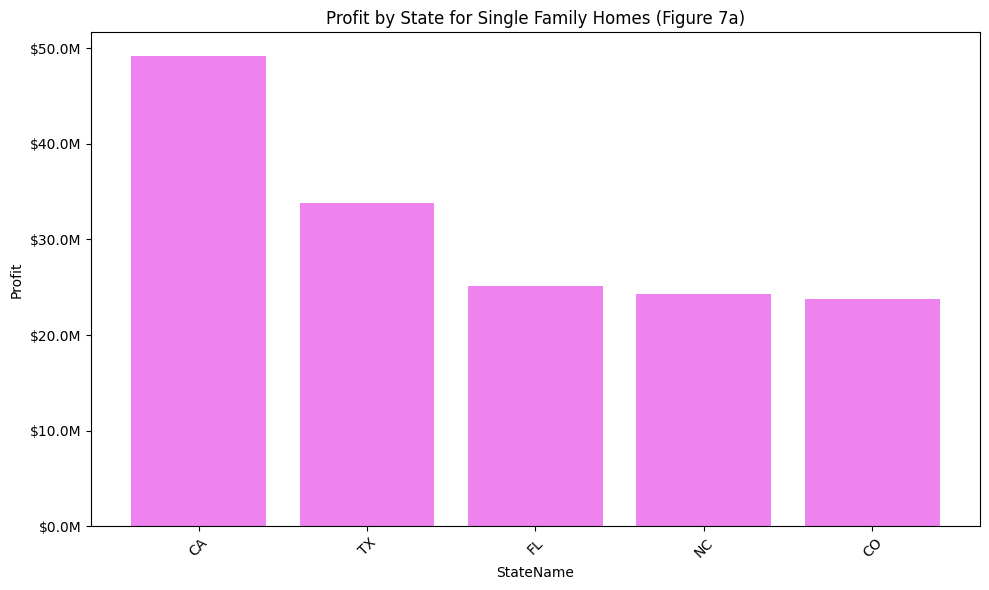

In [ ]:
sorted_df = top_states_by_profit.sort_values(by='Profit', ascending=False)
def millions_formatter(x, pos):
    return f'${x/1e6:.1f}M'

plt.figure(figsize=(10, 6))
plt.bar(sorted_df['StateName'], sorted_df['Profit'], color='violet')
plt.xlabel('StateName')
plt.ylabel('Profit')
plt.title('Profit by State for Single Family Homes (Figure 7a)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.tight_layout()
plt.show()

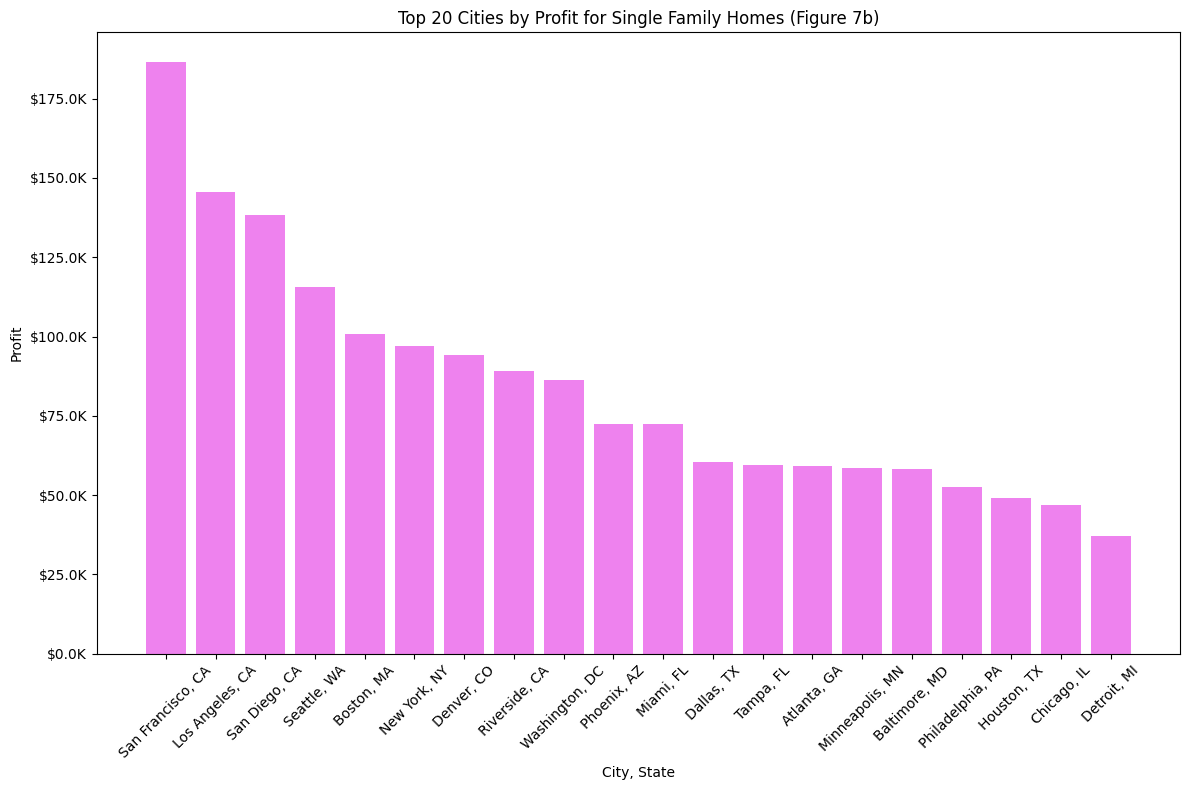

In [ ]:
filtered_df = melted_df[melted_df['RegionName'] != 'United States']
top_20_cities = filtered_df.head(20).sort_values(by='Profit', ascending=False)
def thousands_formatter(x, pos):
    return f'${x/1e3:.1f}K'

plt.figure(figsize=(12, 8))
plt.bar(top_20_cities['RegionName'], top_20_cities['Profit'], color='violet')
plt.xlabel('City, State')
plt.ylabel('Profit')
plt.title('Top 20 Cities by Profit for Single Family Homes (Figure 7b)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()

In [ ]:
total_profit = grouped_by_state['Profit'].sum()
total_forecast_value = grouped_by_state['Forecast Value'].sum()
overall_roi = total_profit / total_forecast_value
average_profit = grouped_by_state['Profit'].mean()

formatted_roi = f'{overall_roi:.2%}'
formatted_average_profit = f'${average_profit:,.2f}'

print(f'Overall ROI for Single Family Homes: {formatted_roi}')
print(f'Average Profit for Single Family Homes: {formatted_average_profit}')

Overall ROI for Single Family Homes: 10.46%
Average Profit for Single Family Homes: $11,754,121.96


In [ ]:
rental_all_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00
0,102001,0,United States,country,NaN,1898.085264,1903.998036,1914.340923,1926.062012,1939.741383,1950.773152,1961.957243,1968.929946,1972.033447,1969.910642,1965.063481,1961.578611,1963.898021,1971.370300,1982.677025
1,394913,1,"New York, NY",msa,NY,3031.920638,3045.291834,3070.057348,3103.766320,3142.028920,3176.921518,3201.358885,3210.819663,3209.919221,3193.448153,3170.689767,3152.301502,3156.339043,3174.198012,3205.572269
2,753899,2,"Los Angeles, CA",msa,CA,2833.205183,2839.936597,2851.956795,2867.210075,2877.195545,2887.645831,2902.366617,2915.134679,2918.774513,2914.996744,2902.455419,2892.708612,2895.963930,2906.877789,2924.553382
3,394463,3,"Chicago, IL",msa,IL,1901.691215,1915.196429,1931.171869,1948.053294,1971.057249,1991.738124,2005.048535,2012.419066,2009.776288,2002.083981,1993.872517,1997.331169,2008.975251,2023.998489,2038.100922
4,394514,4,"Dallas, TX",msa,TX,1740.581915,1743.199346,1751.977058,1757.294725,1766.017108,1773.730378,1783.162065,1785.984970,1782.936633,1776.259449,1769.703467,1760.652852,1755.143757,1751.543479,1755.441552


In [ ]:
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_vars = rental_all_df.columns.difference(id_vars)
melted_df = pd.melt(rental_all_df, id_vars=id_vars, value_vars=date_vars, var_name='Date', value_name='Price')
melted_df['Date'] = pd.to_datetime(melted_df['Date'])
pivoted_df = melted_df.pivot_table(index=id_vars, columns='Date', values='Price').reset_index()
melted_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
0,102001,0,United States,country,NaN,2023-01-31,1898.085264
1,394913,1,"New York, NY",msa,NY,2023-01-31,3031.920638
2,753899,2,"Los Angeles, CA",msa,CA,2023-01-31,2833.205183
3,394463,3,"Chicago, IL",msa,IL,2023-01-31,1901.691215
4,394514,4,"Dallas, TX",msa,TX,2023-01-31,1740.581915


In [ ]:
melted_df['Cost of Upgrades'] = melted_df['Price'] * 0.10 + melted_df['Price'] * 0.30 + melted_df['Price'] * 0.02
melted_df['Total Cost'] = melted_df['Price'] + melted_df['Cost of Upgrades']
melted_df['Forecast Value'] = melted_df['Price'] * 0.53 + melted_df['Price']
melted_df['Profit'] = melted_df['Forecast Value'] - melted_df['Total Cost']
melted_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price,Cost of Upgrades,Total Cost,Forecast Value,Profit
0,102001,0,United States,country,NaN,2023-01-31,1898.085264,797.195811,2695.281075,2904.070454,208.789379
1,394913,1,"New York, NY",msa,NY,2023-01-31,3031.920638,1273.406668,4305.327306,4638.838576,333.511270
2,753899,2,"Los Angeles, CA",msa,CA,2023-01-31,2833.205183,1189.946177,4023.151360,4334.803930,311.652570
3,394463,3,"Chicago, IL",msa,IL,2023-01-31,1901.691215,798.710310,2700.401525,2909.587558,209.186034
4,394514,4,"Dallas, TX",msa,TX,2023-01-31,1740.581915,731.044404,2471.626319,2663.090330,191.464011


In [ ]:
grouped_by_state = melted_df.groupby('StateName').agg({
    'RegionID': 'first',
    'SizeRank': 'first',
    'RegionName': 'first',
    'RegionType': 'first',
    'Price': 'sum',
    'Cost of Upgrades': 'sum',
    'Total Cost': 'sum',
    'Forecast Value': 'sum',
    'Profit': 'sum'
}).reset_index()

grouped_by_state_sorted = grouped_by_state.sort_values(by='Profit', ascending=False)
top_states_by_profit = grouped_by_state_sorted.head()
top_states_by_profit.head()

,StateName,RegionID,SizeRank,RegionName,RegionType,Price,Cost of Upgrades,Total Cost,Forecast Value,Profit
4,CA,753899,2,"Los Angeles, CA",msa,1.045306e+06,439028.445764,1.484334e+06,1.599318e+06,114983.640557
8,FL,394856,8,"Miami, FL",msa,7.351302e+05,308754.685705,1.043885e+06,1.124749e+06,80864.322447
42,TX,394514,4,"Dallas, TX",msa,6.671545e+05,280204.903030,9.473594e+05,1.020746e+06,73386.998413
5,CO,394530,19,"Denver, CO",msa,5.060501e+05,212541.053271,7.185912e+05,7.742567e+05,55665.513952
26,NC,394458,23,"Charlotte, NC",msa,4.883236e+05,205095.923224,6.934195e+05,7.471351e+05,53715.598940


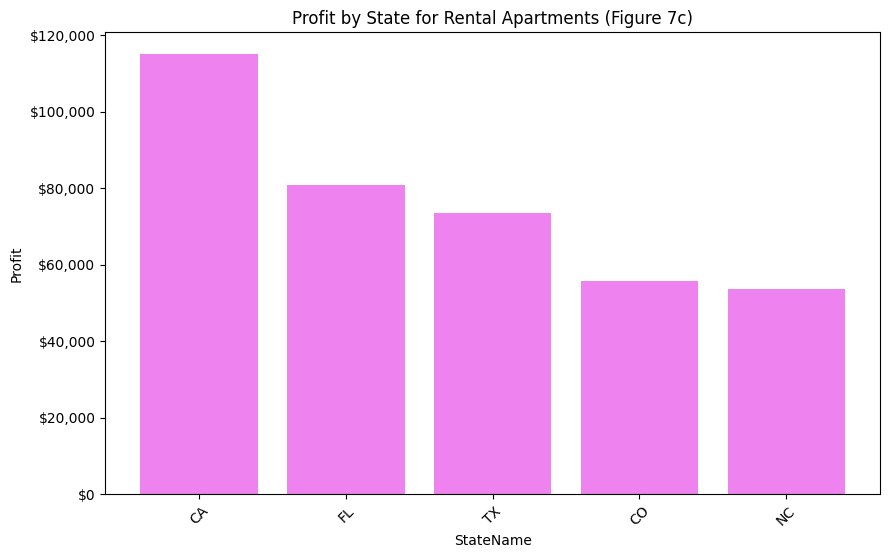

In [ ]:
def thousands_formatter(x, pos):
    return f'${x:,.0f}'

sorted_df = top_states_by_profit.sort_values(by='Profit', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(sorted_df['StateName'], sorted_df['Profit'], color='violet')
plt.xlabel('StateName')
plt.ylabel('Profit')
plt.title('Profit by State for Rental Apartments (Figure 7c)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

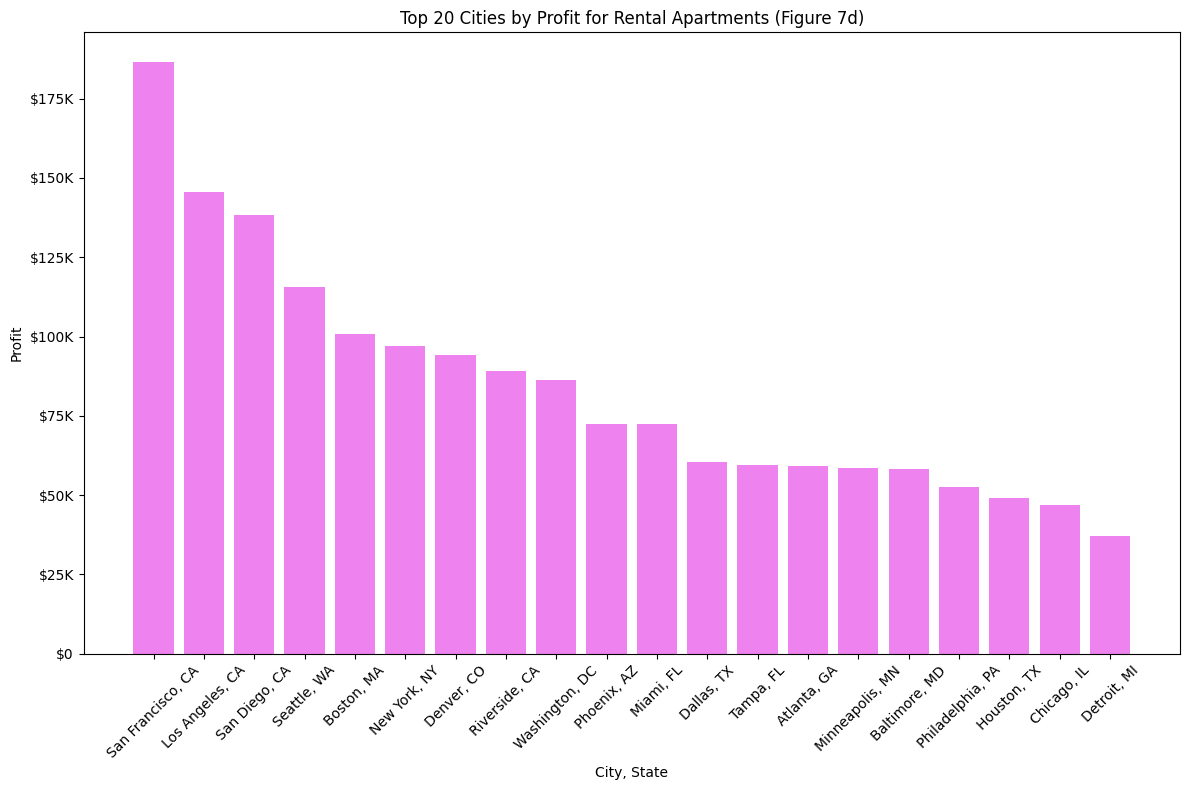

In [ ]:
def profit_formatter(x, pos):
    if x < 1000:
        return f'${x:.0f}'
    elif x < 10000:
        return f'${x/1000:.1f}K'
    else:
        return f'${x/1000:.0f}K'

top_20_cities = filtered_df.head(20).sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(top_20_cities['RegionName'], top_20_cities['Profit'], color='violet')
plt.xlabel('City, State')
plt.ylabel('Profit')
plt.title('Top 20 Cities by Profit for Rental Apartments (Figure 7d)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(profit_formatter))
plt.tight_layout()
plt.show()

In [ ]:
total_profit = grouped_by_state['Profit'].sum()
total_forecast_value = grouped_by_state['Forecast Value'].sum()
overall_roi = total_profit / total_forecast_value
average_profit = grouped_by_state['Profit'].mean()

formatted_roi = f'{overall_roi:.2%}'
formatted_average_profit = f'${average_profit:,.2f}'

print(f'Overall ROI for Rental Apartments: {formatted_roi}')
print(f'Average Profit for Rental Apartments: {formatted_average_profit}')

Overall ROI for Rental Apartments: 7.19%
Average Profit for Rental Apartments: $24,788.81



When evaluating profit after upgrades, mortgage payments, and taxes, we see a significant return of approximately 10% for both single-family homes and rental apartments. For consistency in our calculations, we applied the same percentages to both property types. For single-family homes, we assumed upgrades at 5% of the property value, mortgage costs at 30%, and taxes at 2%. For rental apartments, we assumed upgrades at 10% of the rental value, mortgage costs at 30%, and taxes at 2%, reflecting typical expenditures and budgeting practices.

To forecast the value for both single-family homes and rental apartments, we applied a 53% increase in overall value over the year, based on average data from the 2024 home values dataset. With a $6 million investment, we identified California, Texas, Florida, North Carolina, and Colorado (Figure 7a) as the best states for profit from single-family homes due to their high-value properties and metropolitan areas. Within these states, the cities offering the highest profit and ROI after upgrades, mortgage costs, and taxes are San Francisco, Los Angeles, and San Diego in California (Figure 7b), as well as Seattle, Boston, and New York. The overall ROI for single-family homes is 10.46%.

Similarly, with a $6 million investment, we found that California, Florida, Texas, Colorado, and North Carolina (Figure 7c) are also the best states for profit from rental apartments due to their high-rise buildings and vibrant metro areas that attract young working professionals. The cities providing the highest profit and ROI for rental apartments are again San Francisco, Los Angeles, and San Diego in California (Figure 7d), along with Seattle, Boston, and New York. The overall ROI for rental apartments is 7.19%.

